In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('development.csv')
df.head()

label gender  profession ideology_binary  \
0  00369358fac3b8d42845f82f0c3ececc   male  journalist            left   
1  00369358fac3b8d42845f82f0c3ececc   male  journalist            left   
2  00369358fac3b8d42845f82f0c3ececc   male  journalist            left   
3  00369358fac3b8d42845f82f0c3ececc   male  journalist            left   
4  00369358fac3b8d42845f82f0c3ececc   male  journalist            left   

  ideology_multiclass                                              tweet  
0                left  @user Escribió un libro resultón, con gracejo,...  
1                left       @user Lo prometido es deuda. Aquí la foto: .  
2                left  @user Bastante ñoña. Me jarté a llorar. De lo ...  
3                left  @user No sé nada acerca de eso, pero está clar...  
4                left  @user ¿En qué medio tienen su podcast esos, di...

In [4]:
dev_test = pd.read_csv("development_test.csv")

# Análisis de los datos

1. Análisis exploratorio del conjunto de datos

## Descripción general del dataset
número de instancias, variables, tipos de datos,
valores nulos).

In [ ]:

# --- Estadísticas básicas ---
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])
print("\nTipos de datos:")
print(df.dtypes)

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nValores únicos por columna:")
print(df.nunique())


Número de filas: 14400
Número de columnas: 6

Tipos de datos:
label                  object
gender                 object
profession             object
ideology_binary        object
ideology_multiclass    object
tweet                  object
dtype: object

Valores nulos por columna:
label                  0
gender                 0
profession             0
ideology_binary        0
ideology_multiclass    0
tweet                  0
dtype: int64

Valores únicos por columna:
label                    360
gender                     2
profession                 3
ideology_binary            2
ideology_multiclass        4
tweet                  14384
dtype: int64


In [ ]:
import pandas as pd

# --- Estadísticas básicas tabuladas ---
info_table = pd.DataFrame({
    "Tipo de dato": df.dtypes,
    "Nulos": df.isnull().sum(),
    "Valores únicos": df.nunique()
})

print("\n=== INFORME BÁSICO DEL DATAFRAME ===\n")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}\n")
print(info_table)



=== INFORME BÁSICO DEL DATAFRAME ===

Filas: 14400  |  Columnas: 6

                    Tipo de dato  Nulos  Valores únicos
label                     object      0             360
gender                    object      0               2
profession                object      0               3
ideology_binary           object      0               2
ideology_multiclass       object      0               4
tweet                     object      0           14384


## Distribución del numero de tweets por variable

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# --------- ESTILO GLOBAL ---------
sns.set_theme(style="whitegrid", font_scale=1.0)
plt.rcParams["font.family"] = "DejaVu Sans"

# --------- PALETAS ---------
palette_gender = {"male": "#345C8C", "female": "#D57A5C"}

palette_prof = {
    "journalist": "#6AB7A8",
    "politician": "#F2A65A",
    "celebrity":  "#8C9BD5",
}

palette_ideo = {
    "left":           "#1f77b4",
    "moderate_left":  "#2ca02c",
    "moderate_right": "#ff7f0e",
    "right":          "#d62728"
}

# Paleta binaria CANÓNICA (LEFT / RIGHT)
palette_ideo_group = {"LEFT": "#1f77b4", "RIGHT": "#d62728"}

TEXT_COL       = "tweet"
IDEO_MULTI_COL = "ideology_multiclass"
IDEO_BIN_COL   = "ideology_binary"   # asumimos que ya existe en df

# --------- NORMALIZACIÓN IDEOLÓGICA ---------

# Agrupación ideológica binaria a partir de multiclase
df["ideology_group"] = df[IDEO_MULTI_COL].replace({
    "left": "LEFT",
    "moderate_left": "LEFT",
    "moderate_right": "RIGHT",
    "right": "RIGHT"
})

# Normalizamos la binaria a mayúsculas para evitar problemas de paletas
df[IDEO_BIN_COL] = df[IDEO_BIN_COL].astype(str).str.upper()

# --------- CONTADORES ---------
total = len(df)
gender_counts = df["gender"].value_counts()
prof_counts   = df["profession"].value_counts()
ideo_counts   = df[IDEO_MULTI_COL].value_counts()

professions = prof_counts.index.tolist()
ideologies  = ideo_counts.index.tolist()

# Orden fijo ideológico
ideo_order = ["left", "moderate_left", "moderate_right", "right"]

# --------- TABLAS CRUZADAS PARA OTRAS GRÁFICAS (si las usas) ---------
ct_gender_ideo = pd.crosstab(df["gender"], df[IDEO_MULTI_COL]).reindex(
    index=sorted(gender_counts.index),
    columns=ideo_order,
    fill_value=0
)

ct_prof_ideo = pd.crosstab(df["profession"], df[IDEO_MULTI_COL]).reindex(
    index=professions,
    columns=ideo_order,
    fill_value=0
)


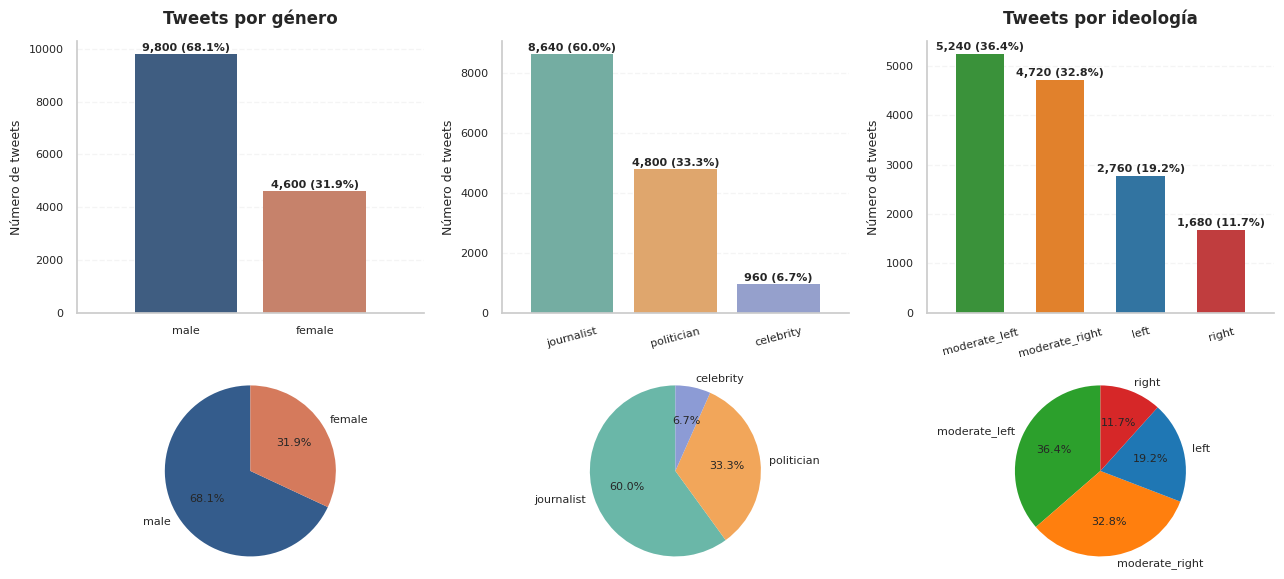

In [ ]:
plt.close('all')

fig = plt.figure(figsize=(13, 7))
gs = gridspec.GridSpec(2, 3, height_ratios=[1.3, 0.9])

ax_bar_gender = fig.add_subplot(gs[0, 0])
ax_bar_prof   = fig.add_subplot(gs[0, 1])
ax_bar_ideo   = fig.add_subplot(gs[0, 2])
ax_pie_gender = fig.add_subplot(gs[1, 0])
ax_pie_prof   = fig.add_subplot(gs[1, 1])
ax_pie_ideo   = fig.add_subplot(gs[1, 2])

# ------------------- BARRA GÉNERO -------------------
sns.countplot(
    data=df,
    x="gender",
    hue="gender",
    palette=palette_gender,
    legend=False,
    edgecolor="none",
    ax=ax_bar_gender,
    width=0.80
)

for p in ax_bar_gender.patches:
    h = p.get_height()
    pct = h / total * 100
    ax_bar_gender.annotate(
        f"{int(h):,} ({pct:.1f}%)",
        (p.get_x() + p.get_width()/2., h + total*0.003),
        ha="center", va="bottom", fontsize=8, fontweight="bold"
    )

ax_bar_gender.set_title("Tweets por género", fontsize=12, fontweight="bold", pad=12)
ax_bar_gender.set_ylabel("Número de tweets", fontsize=9)
ax_bar_gender.set_xlabel("")
ax_bar_gender.tick_params(axis="y", labelsize=8)
ax_bar_gender.tick_params(axis="x", labelsize=8)
ax_bar_gender.spines[["top","right"]].set_visible(False)
ax_bar_gender.grid(axis="y", linestyle="--", alpha=0.2)
ax_bar_gender.margins(x=0.25)

# ------------------- BARRA PROFESIÓN -------------------
prof_df = prof_counts.reset_index()
prof_df.columns = ["profession", "count"]

sns.barplot(
    data=prof_df,
    x="profession",
    y="count",
    hue="profession",
    palette={p: palette_prof[p] for p in prof_df["profession"]},
    legend=False,
    edgecolor="none",
    ax=ax_bar_prof,
    width=0.80
)


for p, (_, row) in zip(ax_bar_prof.patches, prof_df.iterrows()):
    h = p.get_height()
    pct = h / total * 100
    ax_bar_prof.annotate(
        f"{int(h):,} ({pct:.1f}%)",
        (p.get_x() + p.get_width()/2., h + total*0.003),
        ha="center", va="bottom", fontsize=8, fontweight="bold"
    )

ax_bar_gender.set_title("Tweets por género", fontsize=12, fontweight="bold", pad=12)
ax_bar_prof.set_ylabel("Número de tweets", fontsize=9)
ax_bar_prof.set_xlabel("")
ax_bar_prof.tick_params(axis="x", rotation=15, labelsize=8)
ax_bar_prof.tick_params(axis="y", labelsize=8)
ax_bar_prof.spines[["top", "right"]].set_visible(False)
ax_bar_prof.grid(axis="y", linestyle="--", alpha=0.2)
ax_bar_prof.margins(x=0.1)

# ------------------- BARRA IDEOLOGÍA MULTICLASS -------------------
ideo_df = ideo_counts.reset_index()
ideo_df.columns = ["ideology_multiclass", "count"]

sns.barplot(
    data=ideo_df,
    x="ideology_multiclass",
    y="count",
    hue="ideology_multiclass",
    palette={i: palette_ideo[i] for i in ideo_df["ideology_multiclass"]},
    legend=False,
    edgecolor="none",
    ax=ax_bar_ideo,
    width=0.60
)

for p, (_, row) in zip(ax_bar_ideo.patches, ideo_df.iterrows()):
    h = p.get_height()
    pct = h / total * 100
    ax_bar_ideo.annotate(
        f"{int(h):,} ({pct:.1f}%)",
        (p.get_x() + p.get_width()/2., h + total*0.003),
        ha="center", va="bottom", fontsize=8, fontweight="bold"
    )

ax_bar_ideo.set_title("Tweets por ideología", fontsize=12, fontweight="bold", pad=12)
ax_bar_ideo.set_ylabel("Número de tweets", fontsize=9)
ax_bar_ideo.set_xlabel("")
ax_bar_ideo.tick_params(axis="x", rotation=15, labelsize=8)
ax_bar_ideo.tick_params(axis="y", labelsize=8)
ax_bar_ideo.spines[["top","right"]].set_visible(False)
ax_bar_ideo.grid(axis="y", linestyle="--", alpha=0.2)
ax_bar_ideo.margins(x=0.1)

# ------------------- PIE CHARTS -------------------
ax_pie_gender.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[palette_gender[g] for g in gender_counts.index],
    textprops={"fontsize": 8},
    wedgeprops=dict(edgecolor="none")
)
ax_pie_gender.axis("equal")

ax_pie_prof.pie(
    prof_counts,
    labels=professions,
    autopct='%1.1f%%',
    startangle=90,
    colors=[palette_prof[p] for p in professions],
    textprops={"fontsize": 8},
    wedgeprops=dict(edgecolor="none")
)
ax_pie_prof.axis("equal")

ax_pie_ideo.pie(
    ideo_counts,
    labels=ideologies,
    autopct='%1.1f%%',
    startangle=90,
    colors=[palette_ideo[i] for i in ideologies],
    textprops={"fontsize": 8},
    wedgeprops=dict(edgecolor="none")
)
ax_pie_ideo.axis("equal")

plt.tight_layout(rect=[0, 0.03, 1, 0.88])
plt.show()


## Distribución de ideologias

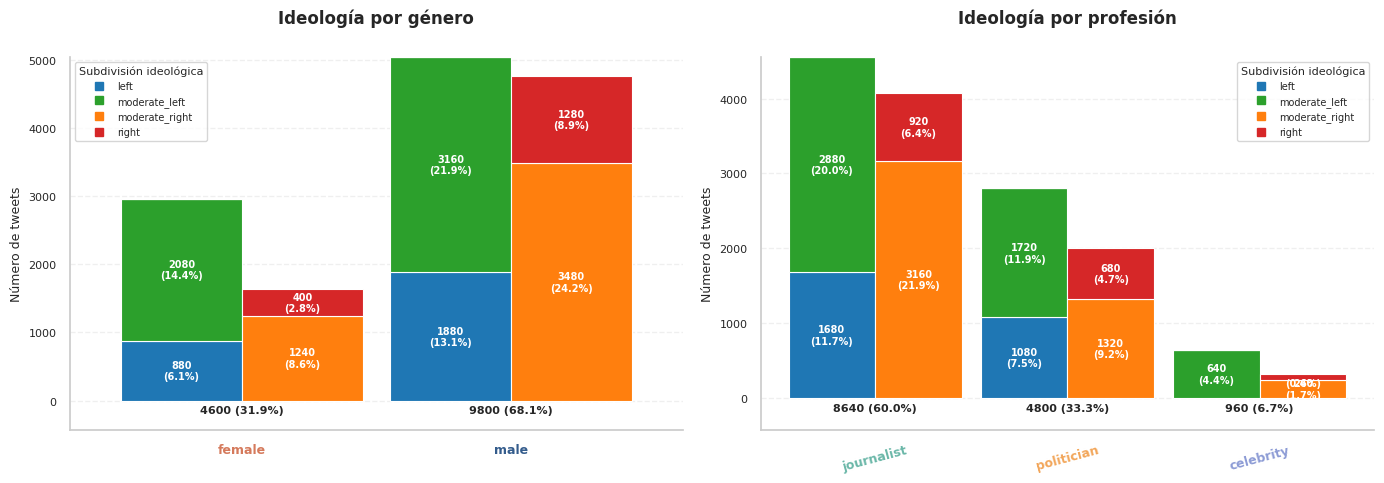

In [ ]:
# ========= FIGURA SOLO BARRAS (GÉNERO Y PROFESIÓN) =========
plt.close('all')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax_bar_gender, ax_bar_prof = axes

# =====================================================
# 1) BARRAS SUBDIVIDIDAS POR GÉNERO (LEFT/RIGHT, APILADAS)
# =====================================================
genders = ct_gender_ideo.index.tolist()
x = np.arange(len(genders))

width = 0.45  # ancho de cada barra (LEFT y RIGHT)

left_pos  = x - width / 2
right_pos = x + width / 2

bottom_left  = np.zeros(len(genders))
bottom_right = np.zeros(len(genders))

for ide in ideo_order:
    vals = ct_gender_ideo[ide].values
    vals_left  = np.where(ide in ["left", "moderate_left"], vals, 0)
    vals_right = np.where(ide in ["moderate_right", "right"], vals, 0)

    prev_bottom_left  = bottom_left.copy()
    prev_bottom_right = bottom_right.copy()

    # barras LEFT
    ax_bar_gender.bar(
        left_pos, vals_left, width,
        bottom=bottom_left,
        color=palette_ideo[ide],
        edgecolor="white", linewidth=0.8
    )
    # barras RIGHT
    ax_bar_gender.bar(
        right_pos, vals_right, width,
        bottom=bottom_right,
        color=palette_ideo[ide],
        edgecolor="white", linewidth=0.8
    )

    bottom_left  += vals_left
    bottom_right += vals_right

    # anotaciones internas por segmento
    for i, g in enumerate(genders):
        if vals_left[i] > 0:
            y_mid_L = prev_bottom_left[i] + vals_left[i] / 2
            pct_seg_L = vals_left[i] / total * 100
            ax_bar_gender.text(
                left_pos[i], y_mid_L,
                f"{int(vals_left[i])}\n({pct_seg_L:.1f}%)",
                ha="center", va="center",
                fontsize=7, color="white", fontweight="bold"
            )
        if vals_right[i] > 0:
            y_mid_R = prev_bottom_right[i] + vals_right[i] / 2
            pct_seg_R = vals_right[i] / total * 100
            ax_bar_gender.text(
                right_pos[i], y_mid_R,
                f"{int(vals_right[i])}\n({pct_seg_R:.1f}%)",
                ha="center", va="center",
                fontsize=7, color="white", fontweight="bold"
            )

# Ajuste de Y con pequeño hueco abajo
ymin_g, ymax_g = ax_bar_gender.get_ylim()
offset_g = total * 0.03
ax_bar_gender.set_ylim(bottom=-offset_g, top=ymax_g)

# Totales por bloque (LEFT+RIGHT) debajo, centrados
for i, g in enumerate(genders):
    total_block = bottom_left[i] + bottom_right[i]
    pct_block = total_block / total * 100
    ax_bar_gender.text(
        x[i], -offset_g * 0.15,
        f"{int(total_block)} ({pct_block:.1f}%)",
        ha="center", va="top",
        fontsize=8, fontweight="bold"
    )

# Estética eje X/Y
ax_bar_gender.set_xticks(x)
ax_bar_gender.set_xticklabels(genders, fontsize=9, fontweight="bold")
for tick, label in zip(ax_bar_gender.get_xticklabels(), genders):
    tick.set_color(palette_gender[label])

ax_bar_gender.set_title("Ideología por género", fontsize=12, fontweight="bold", pad=24)
ax_bar_gender.margins(x=0.10)
ax_bar_gender.set_ylabel("Número de tweets", fontsize=9)
ax_bar_gender.set_xlabel("")
ax_bar_gender.tick_params(axis="y", labelsize=8)
ax_bar_gender.spines[["top", "right"]].set_visible(False)
ax_bar_gender.grid(False, axis="x")
ax_bar_gender.grid(axis="y", linestyle="--", alpha=0.3)

# Leyenda ideológica
handles_ideo = [
    plt.Line2D([0], [0], marker="s", linestyle="", color=palette_ideo[i], label=i)
    for i in ideo_order
]
ax_bar_gender.legend(
    handles=handles_ideo,
    fontsize=7,
    title="Subdivisión ideológica",
    title_fontsize=8,
    loc="upper left"
)


# =====================================================
# 2) BARRAS SUBDIVIDIDAS POR PROFESIÓN (LEFT/RIGHT, APILADAS)
# =====================================================
profs = ct_prof_ideo.index.tolist()
x2 = np.arange(len(profs))

width2 = 0.45
left_pos2  = x2 - width2 / 2
right_pos2 = x2 + width2 / 2

bottom_left2  = np.zeros(len(profs))
bottom_right2 = np.zeros(len(profs))

for ide in ideo_order:
    vals = ct_prof_ideo[ide].values
    vals_left2  = np.where(ide in ["left", "moderate_left"], vals, 0)
    vals_right2 = np.where(ide in ["moderate_right", "right"], vals, 0)

    prev_bottom_left2  = bottom_left2.copy()
    prev_bottom_right2 = bottom_right2.copy()

    ax_bar_prof.bar(
        left_pos2, vals_left2, width2,
        bottom=bottom_left2,
        color=palette_ideo[ide],
        edgecolor="white", linewidth=0.8
    )
    ax_bar_prof.bar(
        right_pos2, vals_right2, width2,
        bottom=bottom_right2,
        color=palette_ideo[ide],
        edgecolor="white", linewidth=0.8
    )

    bottom_left2  += vals_left2
    bottom_right2 += vals_right2

    # anotaciones internas
    for i, p in enumerate(profs):
        if vals_left2[i] > 0:
            y_mid_L = prev_bottom_left2[i] + vals_left2[i] / 2
            pct_seg_L = vals_left2[i] / total * 100
            ax_bar_prof.text(
                left_pos2[i], y_mid_L,
                f"{int(vals_left2[i])}\n({pct_seg_L:.1f}%)",
                ha="center", va="center",
                fontsize=7, color="white", fontweight="bold"
            )

        if vals_right2[i] > 0:
            y_mid_R = prev_bottom_right2[i] + vals_right2[i] / 2
            pct_seg_R = vals_right2[i] / total * 100
            ax_bar_prof.text(
                right_pos2[i], y_mid_R,
                f"{int(vals_right2[i])}\n({pct_seg_R:.1f}%)",
                ha="center", va="center",
                fontsize=7, color="white", fontweight="bold"
            )

# Ajustar Y
ymin_p, ymax_p = ax_bar_prof.get_ylim()
offset_p = total * 0.03
ax_bar_prof.set_ylim(bottom=-offset_p, top=ymax_p)

# Totales por bloque debajo
for i, p in enumerate(profs):
    total_block = bottom_left2[i] + bottom_right2[i]
    pct_block = total_block / total * 100
    ax_bar_prof.text(
        x2[i], -offset_p * 0.15,
        f"{int(total_block)} ({pct_block:.1f}%)",
        ha="center", va="top",
        fontsize=8, fontweight="bold"
    )

# Estética
ax_bar_prof.set_xticks(x2)
ax_bar_prof.set_xticklabels(profs, rotation=15, fontsize=9, fontweight="bold")
for tick, label in zip(ax_bar_prof.get_xticklabels(), profs):
    tick.set_color(palette_prof[label])

ax_bar_prof.set_title("Ideología por profesión", fontsize=12, fontweight="bold", pad=24)
ax_bar_prof.margins(x=0.05)
ax_bar_prof.set_ylabel("Número de tweets", fontsize=9)
ax_bar_prof.set_xlabel("")
ax_bar_prof.tick_params(axis="y", labelsize=8)
ax_bar_prof.spines[["top", "right"]].set_visible(False)
ax_bar_prof.grid(False, axis="x")
ax_bar_prof.grid(axis="y", linestyle="--", alpha=0.3)

ax_bar_prof.legend(
    handles=handles_ideo,
    fontsize=7,
    title="Subdivisión ideológica",
    title_fontsize=8,
    loc="upper right"
)

plt.tight_layout()
plt.show()



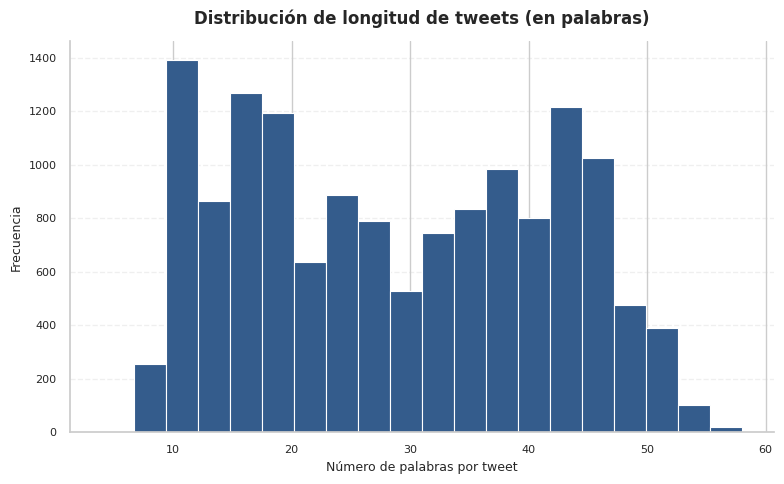

In [ ]:
# --------- LONGITUD EN PALABRAS ---------
df["tweet_length_words"] = df["tweet"].astype(str).apply(lambda x: len(x.split()))

# --------- HISTOGRAMA GLOBAL ---------
plt.figure(figsize=(8, 5))

plt.hist(
    df["tweet_length_words"],
    bins=20,
    color="#345C8C",
    edgecolor="white",
    linewidth=0.8
)

plt.title(
    "Distribución de longitud de tweets (en palabras)",
    fontsize=12,
    fontweight="bold",
    pad=12
)
plt.xlabel("Número de palabras por tweet", fontsize=9)
plt.ylabel("Frecuencia", fontsize=9)
plt.tick_params(axis="both", labelsize=8)

sns.despine(top=True, right=True)
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


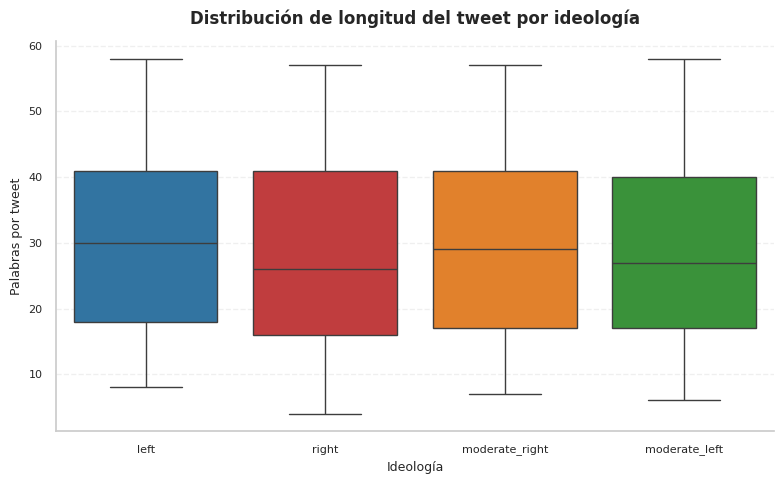

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df,
    x="ideology_multiclass",
    y="tweet_length_words",
    hue="ideology_multiclass",
    palette=palette_ideo,
    legend=False
)

plt.title(
    "Distribución de longitud del tweet por ideología",
    fontsize=12,
    fontweight="bold",
    pad=12
)
plt.xlabel("Ideología", fontsize=9)
plt.ylabel("Palabras por tweet", fontsize=9)
plt.tick_params(axis="both", labelsize=8)

sns.despine(top=True, right=True)
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


## Nubes

In [ ]:
from wordcloud import WordCloud

TEXT_COL = "tweet"

def make_wordcloud(text: str) -> WordCloud:
    """
    Crea un WordCloud completo sin filtrado y sin colorimetría especial.
    Recibe un string con todo el texto concatenado.
    """
    wc = WordCloud(
        width=800,
        height=600,
        background_color="white"
    ).generate(text)
    return wc



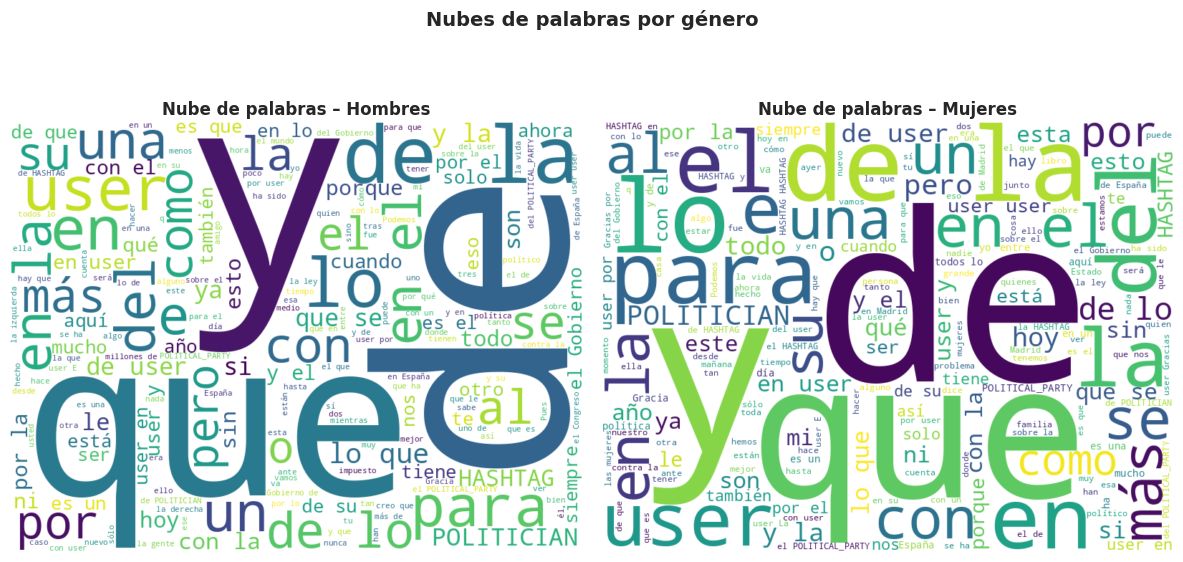

In [ ]:

text_male = " ".join(df.loc[df["gender"] == "male", TEXT_COL].astype(str))
text_female = " ".join(df.loc[df["gender"] == "female", TEXT_COL].astype(str))

wc_male = make_wordcloud(text_male)
wc_female = make_wordcloud(text_female)

plt.close('all')
fig, (ax_male, ax_female) = plt.subplots(1, 2, figsize=(12, 6))

ax_male.imshow(wc_male, interpolation="bilinear")
ax_male.axis("off")
ax_male.set_title("Nube de palabras – Hombres", fontsize=12, fontweight="bold")

ax_female.imshow(wc_female, interpolation="bilinear")
ax_female.axis("off")
ax_female.set_title("Nube de palabras – Mujeres", fontsize=12, fontweight="bold")

fig.suptitle("Nubes de palabras por género", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

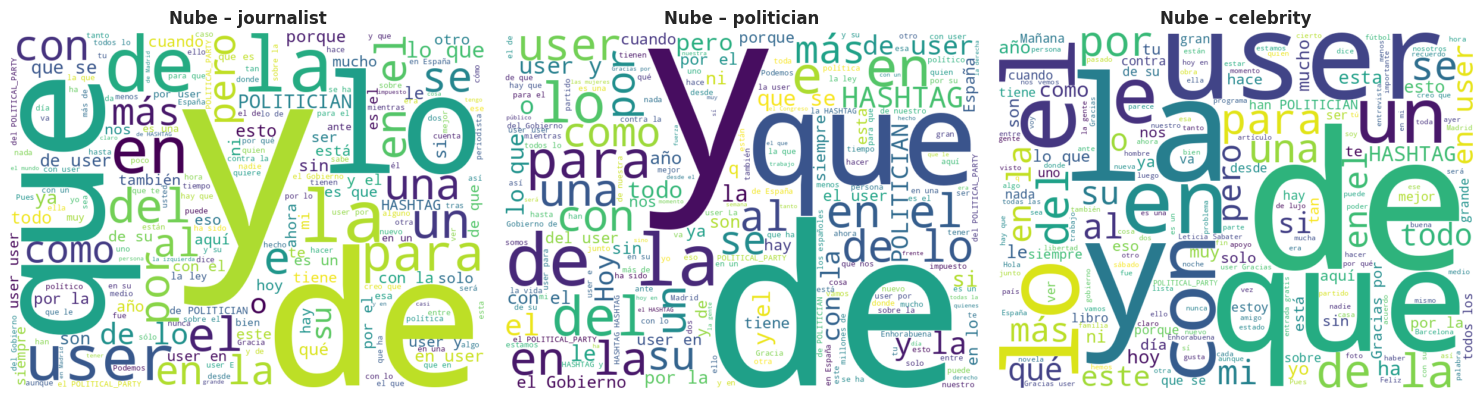

In [ ]:
n_prof = len(professions)
fig, axes = plt.subplots(1, n_prof, figsize=(5 * n_prof, 5))

if n_prof == 1:
    axes = [axes]

for ax, prof in zip(axes, professions):
    text_prof = " ".join(df.loc[df["profession"] == prof, TEXT_COL].astype(str))

    if not text_prof.strip():
        ax.axis("off")
        ax.set_title(f"Sin texto – {prof}", fontsize=11, fontweight="bold")
        continue

    wc_prof = make_wordcloud(text_prof)

    ax.imshow(wc_prof, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Nube – {prof}", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

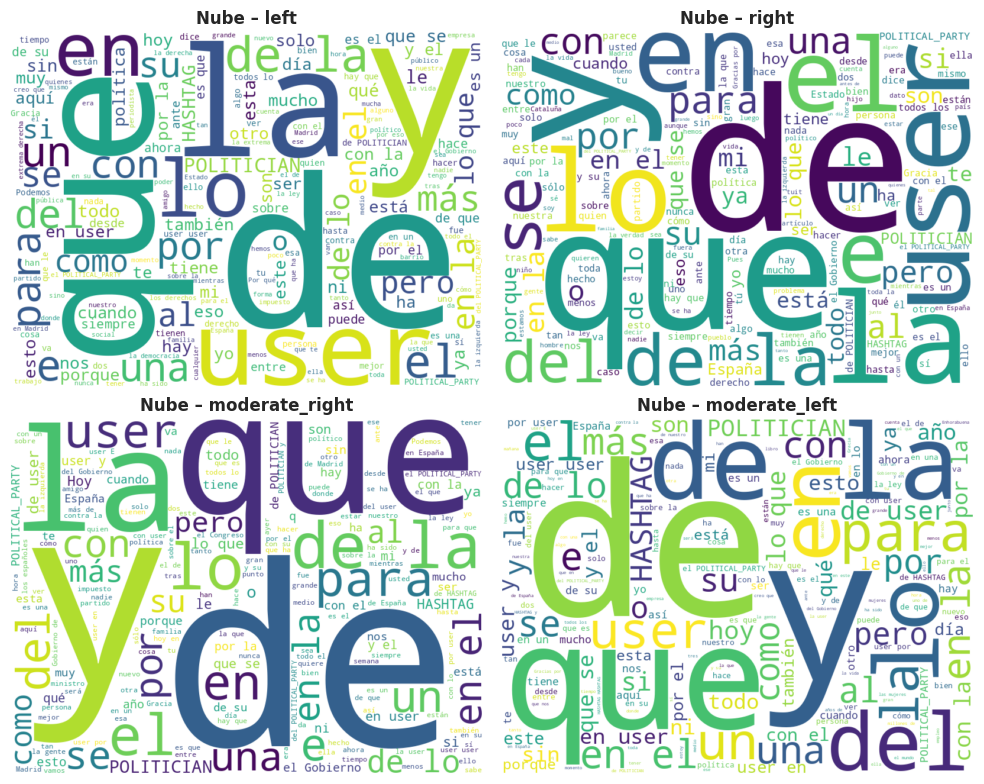

In [ ]:
IDEO_MULTI_COL = "ideology_multiclass"
ideos = df[IDEO_MULTI_COL].dropna().unique()
n_ideos = len(ideos)

if n_ideos == 4:
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()
else:
    fig, axes = plt.subplots(1, n_ideos, figsize=(5 * n_ideos, 5))
    if n_ideos == 1:
        axes = [axes]

for ax, ideo in zip(axes, ideos):
    text_ideo = " ".join(df.loc[df[IDEO_MULTI_COL] == ideo, TEXT_COL].astype(str))

    if not text_ideo.strip():
        ax.axis("off")
        ax.set_title(f"Sin texto – {ideo}", fontsize=11, fontweight="bold")
        continue

    wc_ideo = make_wordcloud(text_ideo)

    ax.imshow(wc_ideo, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Nube – {ideo}", fontsize=12, fontweight="bold")

# Apagar ejes sobrantes si quedan huecos
for ax in axes[len(ideos):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

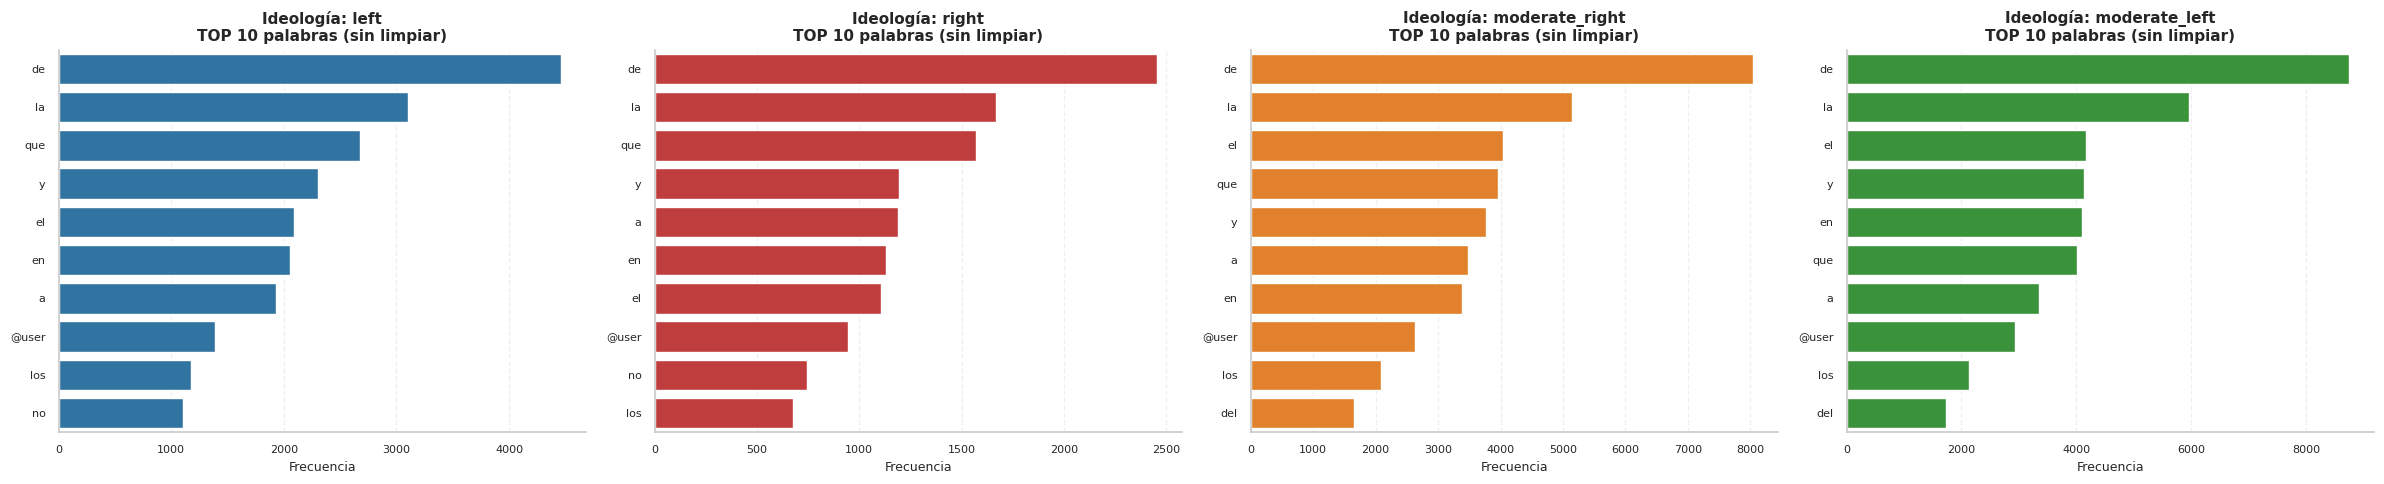

In [ ]:
from collections import Counter

# ==============================
# TOP PALABRAS SUCIAS POR IDEOLOGÍA MULTICLASE
# ==============================

resultados_sucios = {}

for ideo in df[IDEO_MULTI_COL].dropna().unique():
    textos = df.loc[df[IDEO_MULTI_COL] == ideo, TEXT_COL].astype(str).tolist()
    palabras = " ".join(textos).lower().split()
    resultados_sucios[ideo] = Counter(palabras).most_common(10)

n = len(resultados_sucios)
fig, axes = plt.subplots(1, n, figsize=(6 * n, 5))
if n == 1:
    axes = [axes]

for ax, (ideo, conteo) in zip(axes, resultados_sucios.items()):
    palabras = [p for p, _ in conteo]
    freqs = [f for _, f in conteo]

    color = palette_ideo.get(ideo, "#555555")

    sns.barplot(
        x=freqs,
        y=palabras,
        color=color,
        ax=ax
    )

    ax.set_title(
        f"Ideología: {ideo}\nTOP 10 palabras (sin limpiar)",
        fontsize=11,
        fontweight="bold"
    )
    ax.set_xlabel("Frecuencia", fontsize=9)
    ax.set_ylabel("", fontsize=9)
    ax.tick_params(axis="both", labelsize=8)
    ax.spines[["top", "right"]].set_visible(False)
    ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()



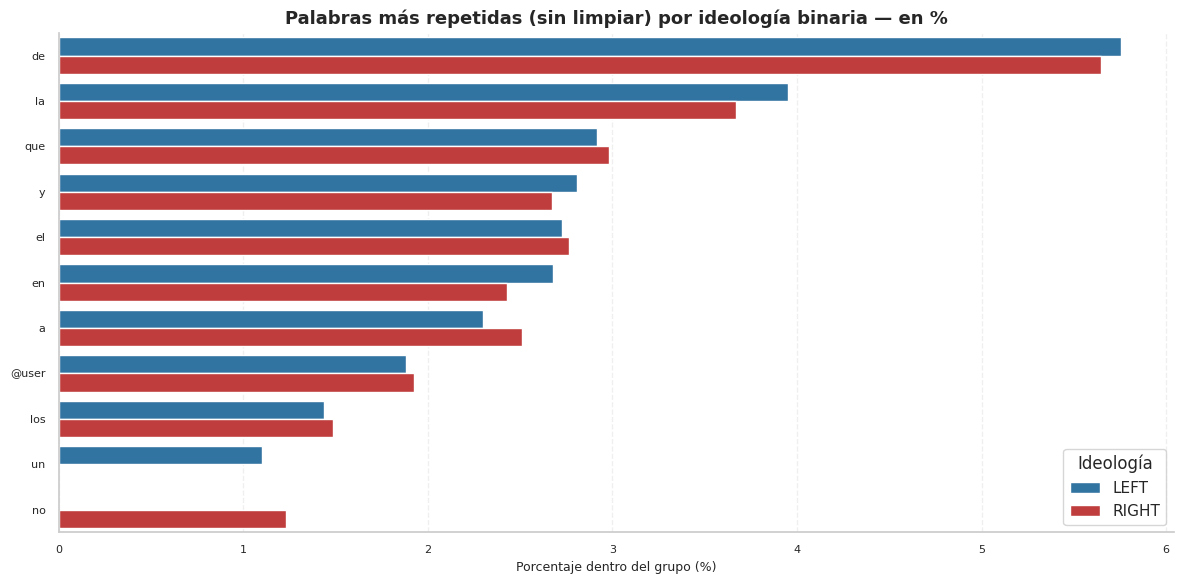

In [ ]:
# ==============================
# TOP PALABRAS SUCIAS POR IDEOLOGÍA BINARIA (PORCENTAJE)
# ==============================

conteos = {}
totales = {}

for ideo in df[IDEO_BIN_COL].dropna().unique():
    textos = df.loc[df[IDEO_BIN_COL] == ideo, TEXT_COL].astype(str).tolist()
    palabras = " ".join(textos).lower().split()

    totales[ideo] = len(palabras)
    conteos[ideo] = Counter(palabras).most_common(10)

rows = []
for ideology, conteo in conteos.items():
    total_palabras = totales[ideology]
    for palabra, freq in conteo:
        porcentaje = (freq / total_palabras) * 100 if total_palabras > 0 else 0
        rows.append([ideology, palabra, porcentaje])

df_pct = pd.DataFrame(rows, columns=["Ideología", "Palabra", "Porcentaje"])

plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_pct,
    x="Porcentaje",
    y="Palabra",
    hue="Ideología",
    dodge=True,
    palette=palette_ideo_group
)

plt.title(
    "Palabras más repetidas (sin limpiar) por ideología binaria — en %",
    fontsize=13,
    fontweight="bold"
)
plt.xlabel("Porcentaje dentro del grupo (%)", fontsize=9)
plt.ylabel("", fontsize=9)
plt.tick_params(axis="both", labelsize=8)

plt.grid(axis="x", linestyle="--", alpha=0.3)
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()



#TF-IDF: representación basada en frecuencias de término e inversa de frecuencia de documento.

In [96]:
#preprocesado del texto
import re

def limpiar_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@[\w_]+', '', tweet)         #eliminar @user
    tweet = re.sub(r'http\S+', '', tweet)         #eliminar URLs
    tweet = re.sub(r'[^a-záéíóúñü ]', ' ', tweet) #dejar solo letras

    #palabras en inglés que se han colado de nombres que hay que filtrar
    tweet = re.sub(r'hashtag', ' ', tweet)
    tweet = re.sub(r'politician', ' ', tweet)
    tweet = re.sub(r'party', ' ', tweet)
    tweet = re.sub(r'political party', ' ', tweet)
    tweet = re.sub(r'political', ' ', tweet)

    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

df["tweet_clean"] = df["tweet"].apply(limpiar_tweet)
df["tweet_clean"].head()

0    escribió un libro resultón con gracejo que mue...
1                   lo prometido es deuda aquí la foto
2    bastante ñoña me jarté a llorar de lo más tera...
3    no sé nada acerca de eso pero está claro que v...
4          en qué medio tienen su podcast esos dice ud
Name: tweet_clean, dtype: object

In [97]:
dev_test["tweet_clean"] = dev_test["tweet"].apply(limpiar_tweet)
dev_test["tweet_clean"].head()

0    feliz de febrero a todas las andaluzas y andal...
1    un placer encontrarme con mi homólogo alemán c...
2    la academia de la llingua asturiana realiza un...
3    cumplir con la ley y con los derechos laborale...
4    la contratación indefinida comienza a ser la n...
Name: tweet_clean, dtype: object

In [98]:
from sklearn.model_selection import train_test_split

X_dev = df["tweet_clean"]
Y_dev = df["ideology_multiclass"]
X_test = dev_test["tweet_clean"]
Y_test = dev_test["ideology_multiclass"]

X_train, X_val, Y_train, Y_val = train_test_split(X_dev, Y_dev, test_size=0.3, stratify=Y_dev,random_state=42)
print(f"División de datos:")
print(f"   TRAIN:      {len(X_train):,} tweets")
print(f"   VALIDATION: {len(X_val):,} tweets")
print(f"   TEST:       {len(X_test):,} tweets")

División de datos:
   TRAIN:      10,080 tweets
   VALIDATION: 4,320 tweets
   TEST:       3,600 tweets


In [99]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.blank("es")
stopwords_es = list(nlp.Defaults.stop_words)

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=3,
    stop_words=stopwords_es
)

X_tfidf_train = vectorizer.fit_transform(X_train)
X_tfidf_val   = vectorizer.transform(X_val)
X_tfidf_test  = vectorizer.transform(X_test)

feature_names_train = vectorizer.get_feature_names_out()

print("Dimensiones de la matriz TF-IDF train set:", X_tfidf_train.shape)
print("Dimensiones de la matriz TF-IDF validation set:", X_tfidf_val.shape)
print("Dimensiones de la matriz TF-IDF test set:", X_tfidf_test.shape)


Dimensiones de la matriz TF-IDF train set: (10080, 5000)
Dimensiones de la matriz TF-IDF validation set: (4320, 5000)
Dimensiones de la matriz TF-IDF test set: (3600, 5000)


In [100]:
feature_names = vectorizer.get_feature_names_out()
feature_names[:50]   #primeras 50 palabras


array(['abajo', 'abandonado', 'abandonar', 'abandono', 'abc', 'abierta',
       'abiertas', 'abierto', 'abogacía', 'abogado', 'abogados', 'abono',
       'abonos', 'abordar', 'aborto', 'abra', 'abrazo', 'abrazos', 'abre',
       'abren', 'abril', 'abrir', 'abro', 'abro hilo', 'absoluta',
       'absolutamente', 'absoluto', 'absurdo', 'abuelos', 'abuso',
       'abusos', 'abusos sexuales', 'acaba', 'acabado', 'acabamos',
       'acaban', 'acabar', 'acabaron', 'acabe', 'acabo', 'acabó',
       'academia', 'académico', 'acaso', 'acceder', 'accesible', 'acceso',
       'accidente', 'acciones', 'acción'], dtype=object)

In [101]:
tfidf_sums = np.asarray(X_tfidf_train.sum(axis=0)).ravel()
top_indices = tfidf_sums.argsort()[::-1][:20]

for idx in top_indices:
    print(feature_names_train[idx], tfidf_sums[idx])


gracias 120.42329743534857
gobierno 114.02342568299336
españa 108.04524812075806
años 103.31815510207267
ley 73.8876495764722
madrid 73.55735486730096
gente 62.00059070603916
mundo 57.86676803313677
año 57.616455598756076
país 56.73649979797708
vida 51.558217904449194
política 51.050209914265466
cosas 50.534957525232606
trabajo 46.406209030332995
mujeres 45.45618114939983
presidente 45.32934029053684
izquierda 43.91606330164386
personas 43.69479463570944
partido 43.17438344134408
historia 42.03383842885117


In [102]:
dicc_tfidf = {}
feature_names = vectorizer.get_feature_names_out()
clases = Y_train.unique()  # usar solo el train set

for c in clases:
    mask = (Y_train == c).values  # mask con mismo tamaño que X_tfidf_train
    matriz_c = X_tfidf_train[mask]

    if matriz_c.shape[0] == 0:
        continue

    media_c = matriz_c.mean(axis=0).A1
    top_idx = np.where(media_c > 0)[0]

    dicc_tfidf[c] = {feature_names[i]: media_c[i] for i in top_idx}


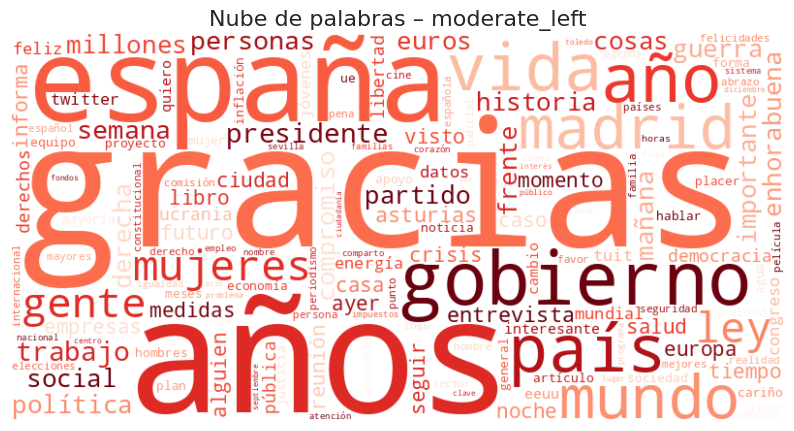

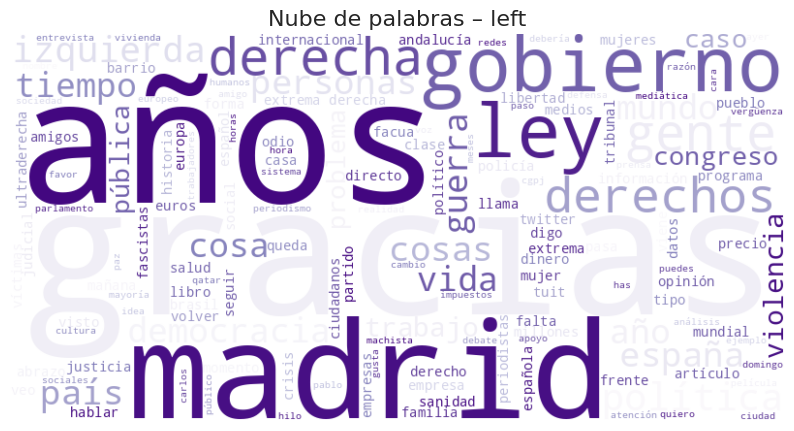

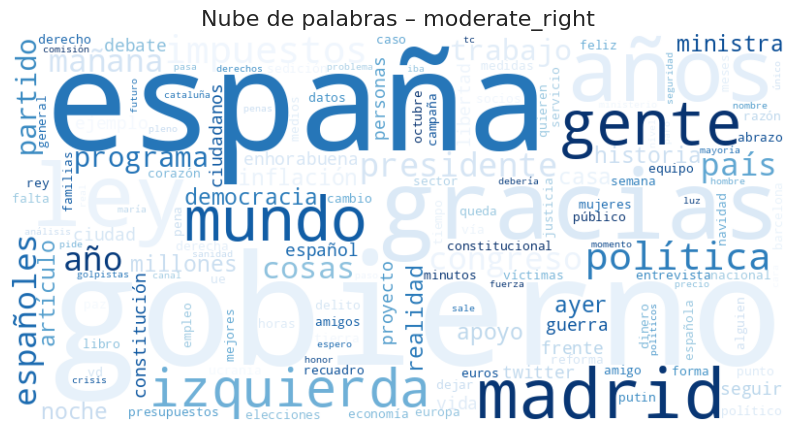

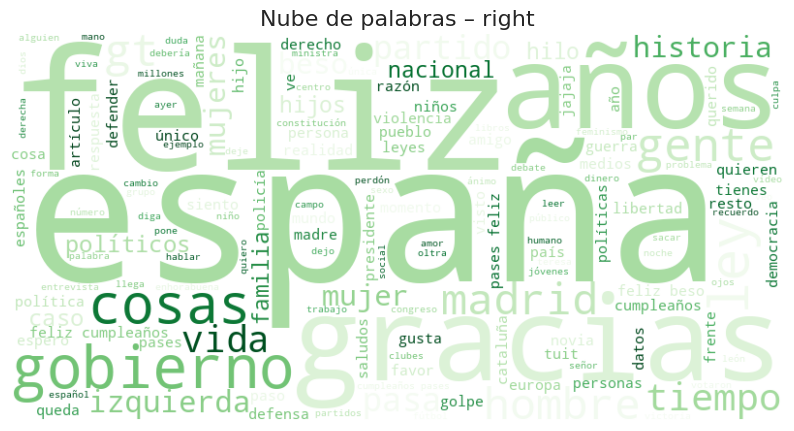

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import minmax_scale

colores = {
    "left": "Purples",
    "right": "Greens",
    "moderate_left": "Reds",
    "moderate_right": "Blues",
}

for clase, palabras_tfidf in dicc_tfidf.items():

    #Normalizar los TF-IDF
    frecuencias = np.array(list(palabras_tfidf.values()))
    frecuencias_norm = minmax_scale(frecuencias, feature_range=(0.1, 1.0))
    palabras_norm = {k: v for k, v in zip(palabras_tfidf.keys(), frecuencias_norm)}

    wc = WordCloud(
        background_color="white",
        colormap=colores.get(clase, "gray"),
        width=800,
        height=400,
        max_words=150
    ).generate_from_frequencies(palabras_norm)

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de palabras – {clase}", fontsize=16)
    plt.show()


#Word2Vec: representación de documentos como el promedio de los embeddings de las palabras que los componen.

In [104]:
!pip install gensim
from gensim.models import Word2Vec


In [105]:
train_tokens = [t.lower().split() for t in X_train]
val_tokens   = [t.lower().split() for t in X_val]
test_tokens  = [t.lower().split() for t in X_test]

In [106]:
#paso los tweets a una lista de palabras
w2v_model = Word2Vec(
    sentences=train_tokens,
    vector_size=300,   #dimensiones del embedding
    window=8,          #ventana de contexto
    min_count=3,       #ignora palabras que aparecen menos 3 veces
    sg=1,              #1 = Skip-gram, 0 = CBOW
    workers=4          #núcleos de CPU
)

In [107]:
from sklearn.preprocessing import normalize

def promedio_embeddings(tokens, model, dim=300):
    vectors = [model.wv[t] for t in tokens if t in model.wv.key_to_index]
    if len(vectors) == 0:
        return np.zeros(dim*2)
    vectors = np.array(vectors)
    avg = vectors.mean(axis=0)
    mx = vectors.max(axis=0)
    return np.concatenate([avg, mx])

dim = w2v_model.vector_size
embeddings_train = np.array([promedio_embeddings(t, w2v_model, dim) for t in train_tokens])
embeddings_val   = np.array([promedio_embeddings(t, w2v_model, dim) for t in val_tokens])
embeddings_test  = np.array([promedio_embeddings(t, w2v_model, dim) for t in test_tokens])


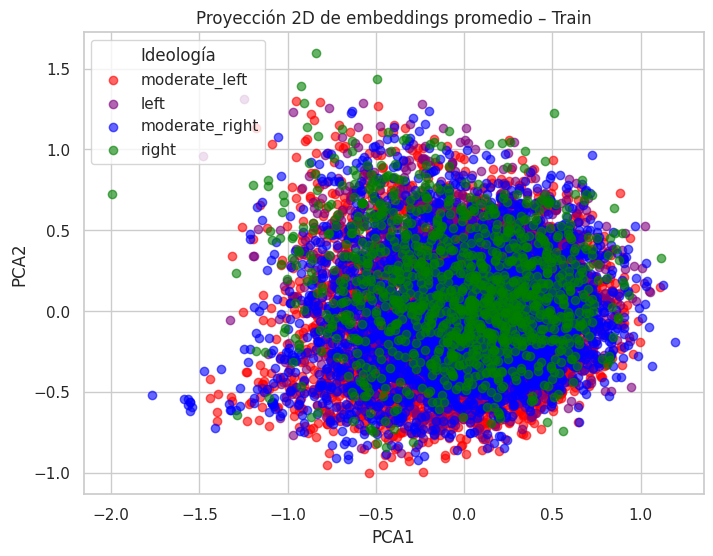

In [108]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
emb_pca_train = pca.fit_transform(embeddings_train)

classes = Y_train.unique()
colors_dict = {
    "left": "purple",
    "right": "green",
    "moderate_left": "red",
    "moderate_right": "blue"
}
colors = [colors_dict[c] for c in Y_train]

plt.figure(figsize=(8,6))
for clase in classes:
    mask = Y_train == clase
    plt.scatter(
        emb_pca_train[mask,0],
        emb_pca_train[mask,1],
        c=colors_dict[clase],
        label=clase,
        alpha=0.6
    )
plt.title("Proyección 2D de embeddings promedio – Train")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Ideología")
plt.show()


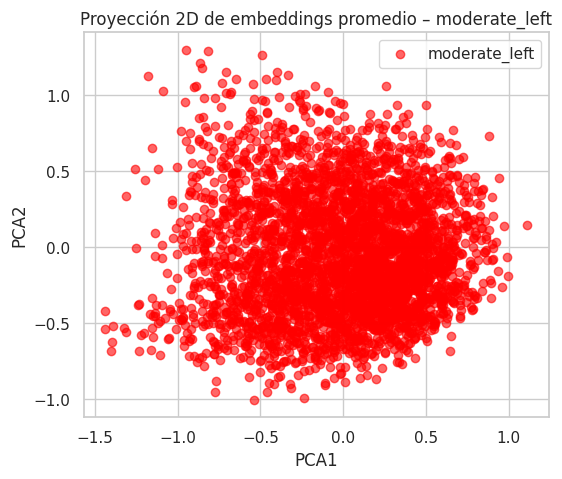

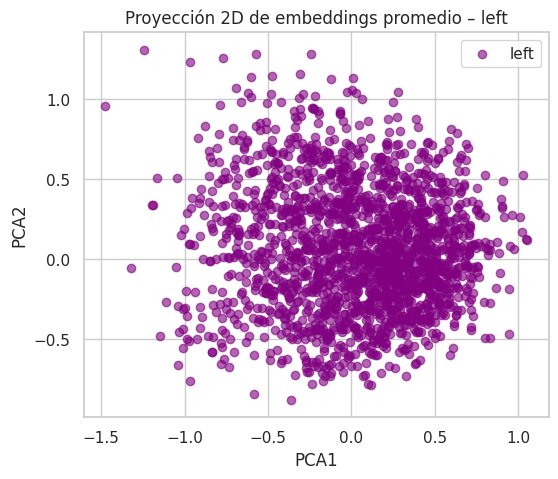

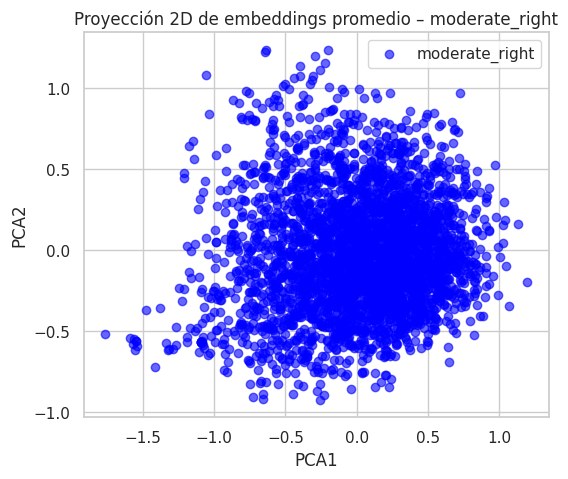

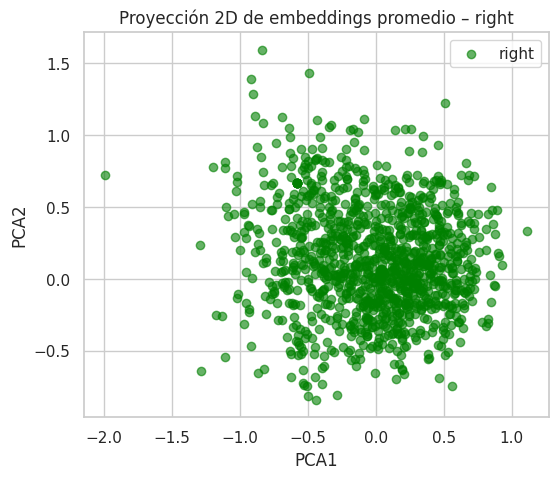

In [109]:
for clase in classes:
    mask = Y_train == clase
    plt.figure(figsize=(6,5))
    plt.scatter(
        emb_pca_train[mask,0],
        emb_pca_train[mask,1],
        c=colors_dict[clase],
        alpha=0.6,
        label=clase
    )
    plt.title(f"Proyección 2D de embeddings promedio – {clase}")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.legend()
    plt.show()


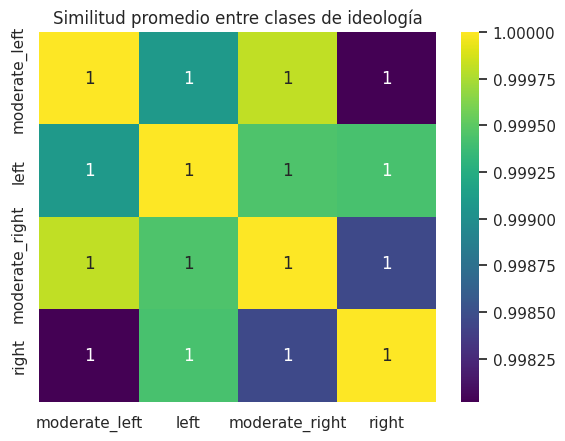

In [110]:
# Promedio por clase
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
clases = Y_train.unique()
emb_clases = np.array([embeddings_train[Y_train==c].mean(axis=0) for c in clases])
sim_matrix_clases = cosine_similarity(emb_clases)

sns.heatmap(sim_matrix_clases, annot=True, xticklabels=clases, yticklabels=clases, cmap="viridis")
plt.title("Similitud promedio entre clases de ideología")
plt.show()

#Embeddings contextuales: obtenidos mediante modelos de tipo Transformer (e.g., BERT, RoBERTa).


In [111]:
!pip install transformers sentence-transformers

In [112]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [113]:
from sentence_transformers import SentenceTransformer

#Cargamos el modelo de BERT en español para poder analizar los tweets
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2',device=device)


In [114]:

tweets_list = X_train.tolist()
tweets_list_val = X_val.tolist()
embeddings_bert = model.encode(tweets_list, batch_size=32, show_progress_bar=True,device=device)
embeddings_bert_val = model.encode(tweets_list_val, batch_size=32, show_progress_bar=True,device=device)
print("Dimensiones de los embeddings contextuales:", embeddings_bert.shape)

Batches:   0%|          | 0/315 [00:00<?, ?it/s]

Batches:   0%|          | 0/135 [00:00<?, ?it/s]

Dimensiones de los embeddings contextuales: (10080, 512)


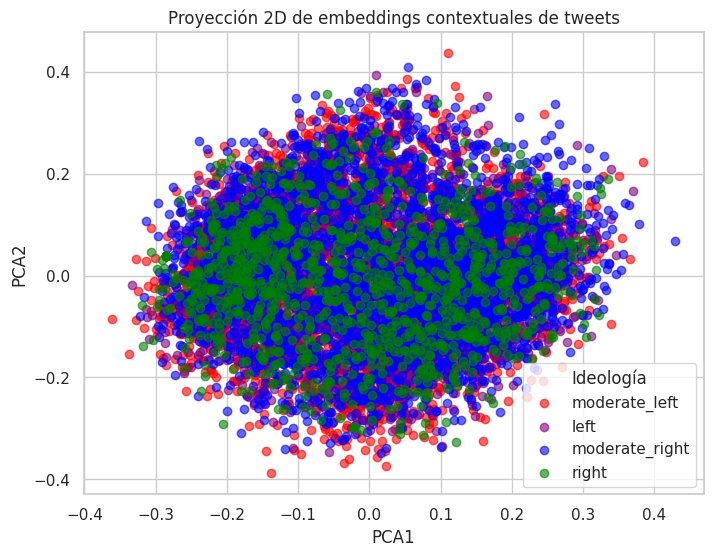

In [115]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
emb_pca = pca.fit_transform(embeddings_bert)

colors_dict = {
    "left": "purple",
    "right": "green",
    "moderate_left": "red",
    "moderate_right": "blue"
}

plt.figure(figsize=(8,6))
for clase in Y_train.unique():
    mask = Y_train == clase
    plt.scatter(
        emb_pca[mask,0],
        emb_pca[mask,1],
        c=colors_dict[clase],
        label=clase,
        alpha=0.6
    )

plt.title("Proyección 2D de embeddings contextuales de tweets")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Ideología")
plt.show()

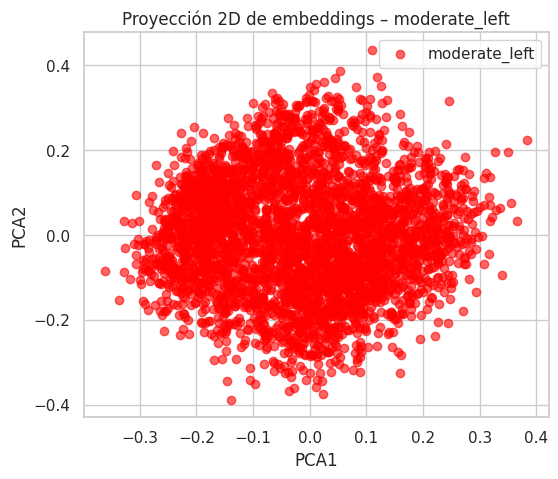

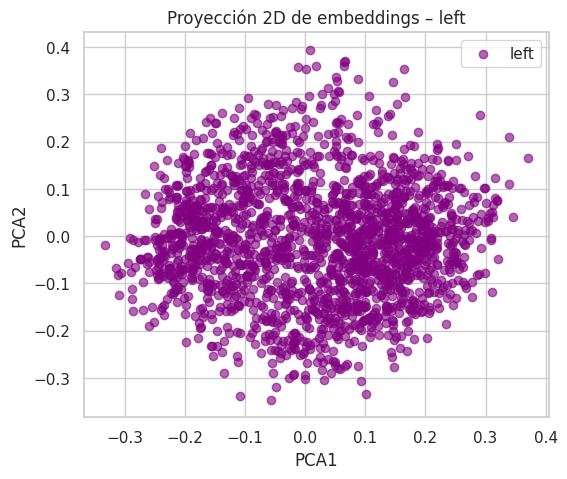

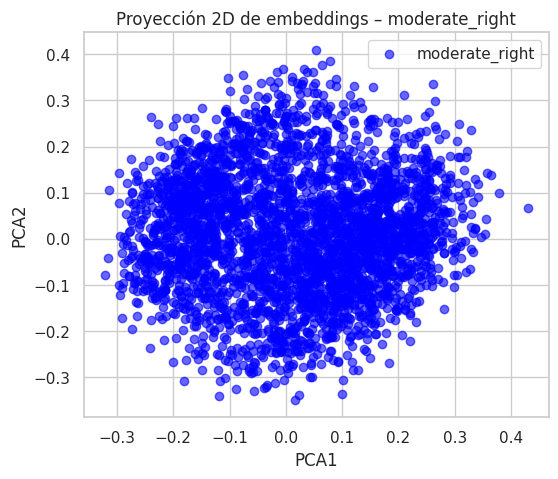

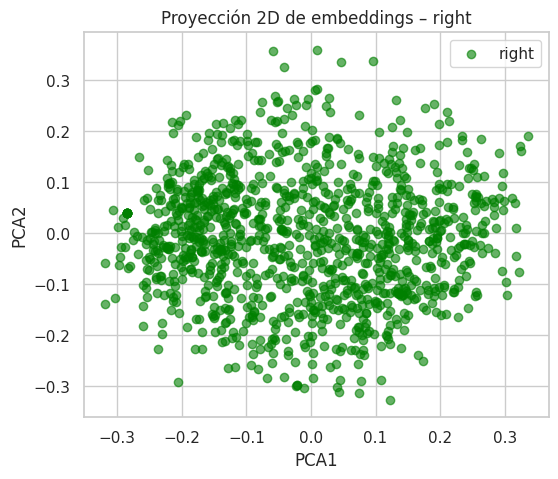

In [116]:
pca = PCA(n_components=2)
emb_pca = pca.fit_transform(embeddings_bert)

colors_dict = {
    "left": "purple",
    "right": "green",
    "moderate_left": "red",
    "moderate_right": "blue"
}

#Graficar solo usando Y_train
for clase in Y_train.unique():
    mask = Y_train == clase
    plt.figure(figsize=(6,5))
    plt.scatter(
        emb_pca[mask, 0],
        emb_pca[mask, 1],
        c=colors_dict[clase],
        alpha=0.6,
        label=clase
    )
    plt.title(f"Proyección 2D de embeddings – {clase}")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.legend()
    plt.show()


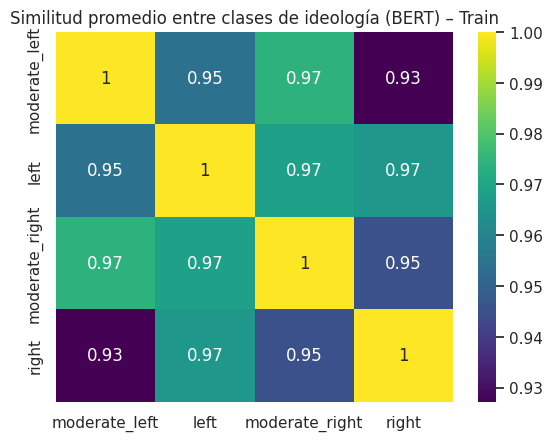

In [117]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Labels de train
clases = Y_train.unique()
emb_clases = np.array([embeddings_bert[Y_train == c].mean(axis=0) for c in clases])

#Similitud coseno
sim_matrix_clases = cosine_similarity(emb_clases)

sns.heatmap(sim_matrix_clases, annot=True, xticklabels=clases, yticklabels=clases, cmap="viridis")
plt.title("Similitud promedio entre clases de ideología (BERT) – Train")
plt.show()


#Comparativa de los tres

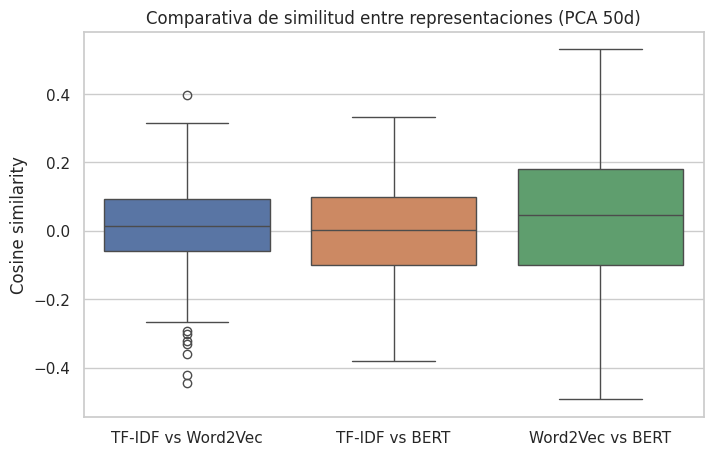

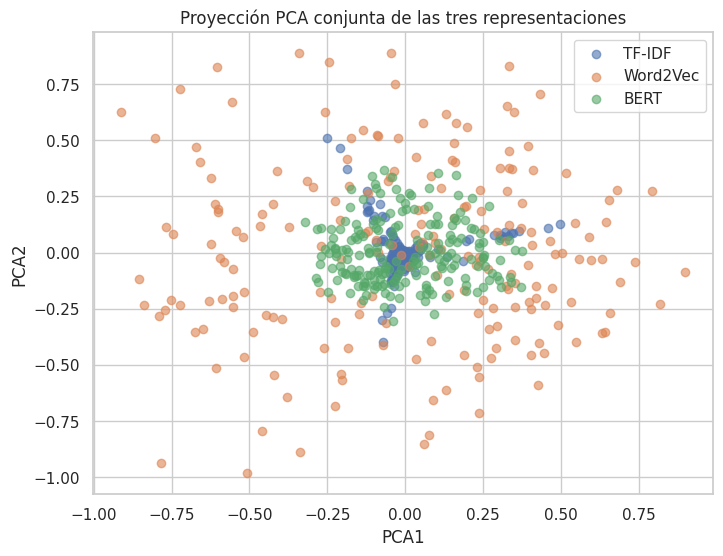

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

sample_size = 200
random_state = 42
np.random.seed(random_state)

#Muestreo aleatorio
total_samples = X_tfidf_train.shape[0]
sample_idx = np.random.choice(total_samples, size=sample_size, replace=False)

X_tfidf_sample = X_tfidf_train.toarray()[sample_idx]
emb_w2v_sample = embeddings_train[sample_idx]
emb_bert_sample = embeddings_bert[sample_idx]


pca_tfidf = PCA(n_components=50, random_state=random_state).fit_transform(X_tfidf_sample)
pca_w2v = PCA(n_components=50, random_state=random_state).fit_transform(emb_w2v_sample)
pca_bert = PCA(n_components=50, random_state=random_state).fit_transform(emb_bert_sample)

#similitud coseno
sim_tfidf_w2v = [cosine_similarity(pca_tfidf[i].reshape(1,-1), pca_w2v[i].reshape(1,-1))[0,0]
                  for i in range(sample_size)]
sim_tfidf_bert = [cosine_similarity(pca_tfidf[i].reshape(1,-1), pca_bert[i].reshape(1,-1))[0,0]
                  for i in range(sample_size)]
sim_w2v_bert = [cosine_similarity(pca_w2v[i].reshape(1,-1), pca_bert[i].reshape(1,-1))[0,0]
                for i in range(sample_size)]
#boxplot
df_sim = pd.DataFrame({
    "TF-IDF vs Word2Vec": sim_tfidf_w2v,
    "TF-IDF vs BERT": sim_tfidf_bert,
    "Word2Vec vs BERT": sim_w2v_bert
})

plt.figure(figsize=(8,5))
sns.boxplot(data=df_sim)
plt.title("Comparativa de similitud entre representaciones (PCA 50d)")
plt.ylabel("Cosine similarity")
plt.show()


X_combined = np.concatenate([pca_tfidf, pca_w2v, pca_bert], axis=0)
labels = ["TF-IDF"]*sample_size + ["Word2Vec"]*sample_size + ["BERT"]*sample_size
X_pca_2d = PCA(n_components=2, random_state=random_state).fit_transform(X_combined)


plt.figure(figsize=(8,6))
for label in ["TF-IDF", "Word2Vec", "BERT"]:
    mask = np.array(labels) == label
    plt.scatter(X_pca_2d[mask,0], X_pca_2d[mask,1], alpha=0.6, label=label)
plt.title("Proyección PCA conjunta de las tres representaciones")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


# Modelos

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np


In [ ]:
classes = np.unique(Y_train)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=Y_train)
class_weight_dict = dict(zip(classes, weights))

def train_lr(X_train, y_train):
    model = LogisticRegression(max_iter=2000, class_weight=class_weight_dict)
    model.fit(X_train, y_train)
    return model

def train_svm(X_train, y_train):
    model = SVC(kernel="linear", probability=True, class_weight=class_weight_dict)
    model.fit(X_train, y_train)
    return model

def eval_model(model, X, y, title="RESULTADOS"):
    preds = model.predict(X)
    print("====", title, "====")
    print(classification_report(y, preds))


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        return self.net(x)



Nota: En train_nn he añadido WeightedRandomSampler que se usa para balancear las clases del dataset, ya que las clases de left y right aparecían poco y antes el modelo nunca las predecía en el word2vec. El sampler aumenta la probabilidad de muestrear ejemplos de estas clases durante el entrenamiento para que el MLP aprenda a reconocerlas, pero he mantenido el resto de la estructura igual que antes para el resto de evaluaciones en las que no sea necesaria.

In [ ]:
def train_nn(X_train, y_train_num, X_val, y_val_num, epochs=10, lr=1e-3, sampler=False):
    device = "cuda" if torch.cuda.is_available() else "cpu"

    X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_t = torch.tensor(y_train_num, dtype=torch.long).to(device)
    X_val_t   = torch.tensor(X_val,   dtype=torch.float32).to(device)
    y_val_t   = torch.tensor(y_val_num,   dtype=torch.long).to(device)

    if sampler:
        from torch.utils.data import WeightedRandomSampler
        class_counts = np.bincount(y_train_num)
        class_weights = 1. / class_counts
        sample_weights = class_weights[y_train_num]
        sampler_obj = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)
        train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, sampler=sampler_obj)
    else:
        train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, shuffle=True)

    val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=256)

    model = MLP(X_train.shape[1], len(np.unique(y_train_num))).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            opt.zero_grad()
            loss = loss_fn(model(xb), yb)
            loss.backward()
            opt.step()

        # evaluación
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for xb, yb in val_loader:
                preds = model(xb).argmax(dim=1)
                correct += (preds == yb).sum().item()
                total += yb.size(0)
        print(f"Epoch {epoch+1}: Val Acc = {correct/total:.4f}")

    return model


TF-IDF

In [ ]:
lr_tfidf = train_lr(X_tfidf_train, Y_train)
eval_model(lr_tfidf, X_tfidf_val, Y_val, "VAL LR + TFIDF")
eval_model(lr_tfidf, X_tfidf_test, Y_test, "TEST LR + TFIDF")


==== VAL LR + TFIDF ====
                precision    recall  f1-score   support

          left       0.32      0.40      0.36       828
 moderate_left       0.51      0.44      0.47      1572
moderate_right       0.49      0.41      0.45      1416
         right       0.23      0.35      0.28       504

      accuracy                           0.41      4320
     macro avg       0.39      0.40      0.39      4320
  weighted avg       0.44      0.41      0.42      4320

==== TEST LR + TFIDF ====
                precision    recall  f1-score   support

          left       0.27      0.35      0.31       640
 moderate_left       0.49      0.39      0.43      1440
moderate_right       0.43      0.41      0.42      1080
         right       0.23      0.31      0.26       440

      accuracy                           0.38      3600
     macro avg       0.36      0.37      0.36      3600
  weighted avg       0.40      0.38      0.39      3600



In [ ]:
svm_tfidf = train_svm(X_tfidf_train, Y_train)
eval_model(svm_tfidf, X_tfidf_val, Y_val, "VAL SVM + TFIDF")
eval_model(svm_tfidf, X_tfidf_test, Y_test, "TEST SVM + TFIDF")


==== VAL SVM + TFIDF ====
                precision    recall  f1-score   support

          left       0.31      0.40      0.35       828
 moderate_left       0.51      0.45      0.48      1572
moderate_right       0.50      0.40      0.44      1416
         right       0.24      0.34      0.28       504

      accuracy                           0.41      4320
     macro avg       0.39      0.40      0.39      4320
  weighted avg       0.44      0.41      0.42      4320

==== TEST SVM + TFIDF ====
                precision    recall  f1-score   support

          left       0.26      0.37      0.30       640
 moderate_left       0.48      0.37      0.42      1440
moderate_right       0.42      0.39      0.40      1080
         right       0.22      0.28      0.24       440

      accuracy                           0.36      3600
     macro avg       0.34      0.35      0.34      3600
  weighted avg       0.39      0.36      0.37      3600



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_num = le.fit_transform(Y_train)
y_val_num   = le.transform(Y_val)
y_test_num  = le.transform(Y_test)


In [ ]:
nn_tfidf = train_nn(X_tfidf_train.toarray(), y_train_num,
                    X_tfidf_val.toarray(), y_val_num)


Epoch 1: Val Acc = 0.4370
Epoch 2: Val Acc = 0.4400
Epoch 3: Val Acc = 0.4306
Epoch 4: Val Acc = 0.4271
Epoch 5: Val Acc = 0.4208
Epoch 6: Val Acc = 0.4206
Epoch 7: Val Acc = 0.4204
Epoch 8: Val Acc = 0.4139
Epoch 9: Val Acc = 0.4218
Epoch 10: Val Acc = 0.4229


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

X_test_t = torch.tensor(X_tfidf_test.toarray(), dtype=torch.float32).to(device)
with torch.no_grad():
    preds = nn_tfidf(X_test_t).argmax(dim=1).cpu().numpy()
print(classification_report(y_test_num, preds))

              precision    recall  f1-score   support

           0       0.28      0.32      0.30       640
           1       0.48      0.44      0.46      1440
           2       0.40      0.45      0.42      1080
           3       0.26      0.20      0.22       440

    accuracy                           0.39      3600
   macro avg       0.35      0.35      0.35      3600
weighted avg       0.39      0.39      0.39      3600



Word2Vec

In [ ]:
X_train_w2v = embeddings_train
X_val_w2v   = embeddings_val
X_test_w2v  = embeddings_test

In [ ]:
lr_w2v = train_lr(X_train_w2v, Y_train)
eval_model(lr_w2v, X_val_w2v, Y_val, "VAL LR + Word2Vec")
eval_model(lr_w2v, X_test_w2v, Y_test, "TEST LR + Word2Vec")

==== VAL LR + Word2Vec ====
                precision    recall  f1-score   support

          left       0.25      0.31      0.28       828
 moderate_left       0.45      0.33      0.38      1572
moderate_right       0.40      0.30      0.35      1416
         right       0.16      0.33      0.21       504

      accuracy                           0.32      4320
     macro avg       0.31      0.32      0.30      4320
  weighted avg       0.36      0.32      0.33      4320

==== TEST LR + Word2Vec ====
                precision    recall  f1-score   support

          left       0.22      0.33      0.27       640
 moderate_left       0.49      0.32      0.38      1440
moderate_right       0.39      0.30      0.34      1080
         right       0.18      0.35      0.23       440

      accuracy                           0.32      3600
     macro avg       0.32      0.32      0.30      3600
  weighted avg       0.37      0.32      0.33      3600



In [ ]:
svm_w2v = train_svm(X_train_w2v, Y_train)
eval_model(svm_w2v, X_val_w2v, Y_val, "VAL SVM + Word2Vec")
eval_model(svm_w2v, X_test_w2v, Y_test, "TEST SVM + Word2Vec")

==== VAL SVM + Word2Vec ====
                precision    recall  f1-score   support

          left       0.23      0.32      0.27       828
 moderate_left       0.46      0.34      0.39      1572
moderate_right       0.41      0.27      0.32      1416
         right       0.16      0.36      0.22       504

      accuracy                           0.31      4320
     macro avg       0.32      0.32      0.30      4320
  weighted avg       0.37      0.31      0.33      4320

==== TEST SVM + Word2Vec ====
                precision    recall  f1-score   support

          left       0.23      0.35      0.27       640
 moderate_left       0.48      0.32      0.38      1440
moderate_right       0.41      0.27      0.33      1080
         right       0.18      0.39      0.24       440

      accuracy                           0.32      3600
     macro avg       0.32      0.33      0.31      3600
  weighted avg       0.38      0.32      0.33      3600



In [ ]:
nn_w2v = train_nn(X_train_w2v, y_train_num, X_val_w2v, y_val_num, epochs=15, lr=1e-3, sampler=True)

device = next(nn_w2v.parameters()).device
X_test_w2v_t = torch.tensor(X_test_w2v, dtype=torch.float32).to(device)
with torch.no_grad():
    preds = nn_w2v(X_test_w2v_t).argmax(dim=1).cpu().numpy()

print("=== TEST MLP + Word2Vec ===")
print(classification_report(y_test_num, preds))


Epoch 1: Val Acc = 0.2806
Epoch 2: Val Acc = 0.2741
Epoch 3: Val Acc = 0.2759
Epoch 4: Val Acc = 0.2803
Epoch 5: Val Acc = 0.2514
Epoch 6: Val Acc = 0.2718
Epoch 7: Val Acc = 0.2502
Epoch 8: Val Acc = 0.3065
Epoch 9: Val Acc = 0.2752
Epoch 10: Val Acc = 0.3238
Epoch 11: Val Acc = 0.2810
Epoch 12: Val Acc = 0.3197
Epoch 13: Val Acc = 0.2236
Epoch 14: Val Acc = 0.2931
Epoch 15: Val Acc = 0.2718
=== TEST MLP + Word2Vec ===
              precision    recall  f1-score   support

           0       0.23      0.19      0.21       640
           1       0.46      0.36      0.41      1440
           2       0.40      0.07      0.13      1080
           3       0.17      0.69      0.28       440

    accuracy                           0.29      3600
   macro avg       0.32      0.33      0.25      3600
weighted avg       0.37      0.29      0.27      3600



BERT

In [ ]:
X_train_bert = embeddings_bert
X_val_bert   = embeddings_bert_val
X_test_bert  = model.encode(X_test.tolist(), batch_size=32, show_progress_bar=True, device=device)


Batches:   0%|          | 0/113 [00:00<?, ?it/s]

In [ ]:
lr_bert = train_lr(X_train_bert, Y_train)
eval_model(lr_bert, X_val_bert, Y_val, "VAL LR + BERT")
eval_model(lr_bert, X_test_bert, Y_test, "TEST LR + BERT")

==== VAL LR + BERT ====
                precision    recall  f1-score   support

          left       0.31      0.38      0.34       828
 moderate_left       0.51      0.39      0.44      1572
moderate_right       0.45      0.31      0.37      1416
         right       0.23      0.51      0.32       504

      accuracy                           0.38      4320
     macro avg       0.37      0.40      0.37      4320
  weighted avg       0.42      0.38      0.38      4320

==== TEST LR + BERT ====
                precision    recall  f1-score   support

          left       0.26      0.35      0.30       640
 moderate_left       0.55      0.36      0.43      1440
moderate_right       0.46      0.38      0.41      1080
         right       0.24      0.49      0.32       440

      accuracy                           0.38      3600
     macro avg       0.38      0.39      0.37      3600
  weighted avg       0.43      0.38      0.39      3600



In [ ]:
svm_bert = train_svm(X_train_bert, Y_train)
eval_model(svm_bert, X_val_bert, Y_val, "VAL SVM + BERT")
eval_model(svm_bert, X_test_bert, Y_test, "TEST SVM + BERT")

==== VAL SVM + BERT ====
                precision    recall  f1-score   support

          left       0.31      0.39      0.34       828
 moderate_left       0.52      0.37      0.44      1572
moderate_right       0.47      0.32      0.38      1416
         right       0.23      0.55      0.32       504

      accuracy                           0.38      4320
     macro avg       0.38      0.41      0.37      4320
  weighted avg       0.43      0.38      0.39      4320

==== TEST SVM + BERT ====
                precision    recall  f1-score   support

          left       0.27      0.38      0.31       640
 moderate_left       0.56      0.34      0.43      1440
moderate_right       0.46      0.36      0.40      1080
         right       0.23      0.50      0.32       440

      accuracy                           0.37      3600
     macro avg       0.38      0.40      0.36      3600
  weighted avg       0.44      0.37      0.38      3600



In [ ]:
nn_bert = train_nn(X_train_bert, y_train_num, X_val_bert, y_val_num, epochs=10, lr=1e-3, sampler=False)

device = next(nn_bert.parameters()).device
X_test_bert_t = torch.tensor(X_test_bert, dtype=torch.float32).to(device)

with torch.no_grad():
    preds = nn_bert(X_test_bert_t).argmax(dim=1).cpu().numpy()

print("=== TEST MLP + BERT ===")
print(classification_report(y_test_num, preds))

Epoch 1: Val Acc = 0.4204
Epoch 2: Val Acc = 0.4373
Epoch 3: Val Acc = 0.4400
Epoch 4: Val Acc = 0.4410
Epoch 5: Val Acc = 0.4326
Epoch 6: Val Acc = 0.4310
Epoch 7: Val Acc = 0.4368
Epoch 8: Val Acc = 0.4322
Epoch 9: Val Acc = 0.4384
Epoch 10: Val Acc = 0.4292
=== TEST MLP + BERT ===
              precision    recall  f1-score   support

           0       0.27      0.31      0.29       640
           1       0.53      0.44      0.48      1440
           2       0.40      0.51      0.45      1080
           3       0.30      0.18      0.22       440

    accuracy                           0.41      3600
   macro avg       0.37      0.36      0.36      3600
weighted avg       0.41      0.41      0.41      3600



Además, se deberá comparar el rendimiento de estas estrategias con un modelo Transformer preentrenado ajustado mediante fine-tuning con la librería Hugging Face Transformers.

In [ ]:
!pip install transformers datasets accelerate evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
from transformers import Trainer
from transformers import DataCollatorWithPadding

from datasets import Dataset

from sklearn.metrics import accuracy_score, f1_score, classification_report
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {device}")

Usando dispositivo: cuda


In [ ]:
#Convertir los datos a formato dataset de hugging face

train_dataset = Dataset.from_dict({
    'text': X_train.tolist(),
    'label': y_train_num.tolist()
})

val_dataset = Dataset.from_dict({
    'text': X_val.tolist(),
    'label': y_val_num.tolist()
})

test_dataset = Dataset.from_dict({
    'text': X_test.tolist(),
    'label': y_test_num.tolist()
})

print(f"Train dataset: {len(train_dataset)} ejemplos")
print(f"Validation dataset: {len(val_dataset)} ejemplos")
print(f"Test dataset: {len(test_dataset)} ejemplos")
print(f"\nEjemplo de dato:")
print(train_dataset[0])

Train dataset: 10080 ejemplos
Validation dataset: 4320 ejemplos
Test dataset: 3600 ejemplos

Ejemplo de dato:
{'text': 'titular titulamos por el asesino nunca por la mujer que ha sido asesinada el foco ha de estar en el agresor y no en la víctima una mujer muere fallece una mujer pierde la vida a manos de', 'label': 1}


In [ ]:
#BERT
model_name = "bert-base-multilingual-cased"

#tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

#se carga el modelo para clasificación
num_labels = len(np.unique(y_train_num))
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    id2label={i: label for i, label in enumerate(le.classes_)},
    label2id={label: i for i, label in enumerate(le.classes_)}
)

print(f"Modelo cargado: {model_name}")
print(f"Número de clases: {num_labels}")
print(f"Clases: {le.classes_}")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Modelo cargado: bert-base-multilingual-cased
Número de clases: 4
Clases: ['left' 'moderate_left' 'moderate_right' 'right']


In [ ]:
#Función para tokenizar los datos
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding=False,
        truncation=True,
        max_length=128
    )

#Tokenizar todos los datasets
print("Tokenizando datasets:")
train_dataset_tokenized = train_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=['text']
)

val_dataset_tokenized = val_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=['text']
)

test_dataset_tokenized = test_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=['text']
)

print(f"\nEjemplo tokenizado:")
print(train_dataset_tokenized[0])

Tokenizando datasets:


Map:   0%|          | 0/10080 [00:00<?, ? examples/s]

Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/3600 [00:00<?, ? examples/s]


Ejemplo tokenizado:
{'label': 1, 'input_ids': [101, 26883, 35984, 73983, 10183, 10125, 10146, 101812, 19096, 10183, 10109, 24033, 10121, 10228, 12477, 10146, 17582, 51758, 10125, 77629, 10133, 10228, 10104, 16627, 10110, 10125, 16942, 11234, 10667, 193, 10192, 10110, 10109, 91031, 10153, 24033, 71349, 18042, 26635, 10153, 24033, 85801, 10109, 11926, 169, 33112, 10104, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
#El data collator hace padding dinámico en cada batch para que no le entren demasiados espacios en blanco
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
#función para calcular las metricas durante el entrenamiento
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    f1_macro = f1_score(labels, predictions, average='macro')
    f1_weighted = f1_score(labels, predictions, average='weighted')

    return {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted
    }

In [ ]:
#Configuración del entrenamiento
training_args = TrainingArguments(
    output_dir='./results_bert_multilingue',     #Donde guarda los checkpoints

    num_train_epochs=3,                          #Número de épocas
    per_device_train_batch_size=16,              #Batch size para train
    per_device_eval_batch_size=32,               #Batch size para eval

    learning_rate=2e-5,                          #Learning rate típico para fine-tuning BERT (según internet yo me fio)
    weight_decay=0.01,                           #Regularización L2
    warmup_steps=500,                            #Warmup del learning rate

    eval_strategy="epoch",                       #Evaluar cada época
    save_strategy="epoch",                       #Guardar cada época
    load_best_model_at_end=True,                 #Cargar el mejor modelo al final
    metric_for_best_model="f1_macro",            #Métrica para elegir el mejor modelo
    greater_is_better=True,                      #Mayor f1_macro es mejor

    logging_dir='./logs_bert',
    logging_steps=50,                            #Log cada 50 pasos

    seed=42,
    fp16=torch.cuda.is_available(),              #Usar mixed precision si hay GPU
)

print("Argumentos de entrenamiento configurados:")
print(f"  - Épocas: {training_args.num_train_epochs}")
print(f"  - Learning rate: {training_args.learning_rate}")
print(f"  - Batch size (train): {training_args.per_device_train_batch_size}")
print(f"  - Métrica principal: {training_args.metric_for_best_model}")

Argumentos de entrenamiento configurados:
  - Épocas: 3
  - Learning rate: 2e-05
  - Batch size (train): 16
  - Métrica principal: f1_macro


In [ ]:
#el trainer que es el que va a hacer el fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_tokenized,
    eval_dataset=val_dataset_tokenized,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print(f"  - Train samples: {len(train_dataset_tokenized)}")
print(f"  - Validation samples: {len(val_dataset_tokenized)}")

  - Train samples: 10080
  - Validation samples: 4320


In [ ]:
#Entrenar el modelo
print("\n" + "="*60)
print("INICIANDO FINE-TUNING")
print("="*60)

train_result = trainer.train()

print("\n" + "="*60)
print("ENTRENAMIENTO FINALIZADO")
print("="*60)
print(f"Training loss final: {train_result.training_loss:.4f}")


INICIANDO FINE-TUNING


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 3


wandb: You chose "Don't visualize my results"



ENTRENAMIENTO FINALIZADO
Training loss final: 1.1639


In [ ]:
#Evaluar en el conjunto de validación
print("\n" + "="*60)
print("EVALUACIÓN EN VALIDATION SET")
print("="*60)

eval_results = trainer.evaluate()

print(f"\nResultados en Validation:")
print(f"  • Accuracy:    {eval_results['eval_accuracy']:.4f}")
print(f"  • F1-macro:    {eval_results['eval_f1_macro']:.4f}")
print(f"  • F1-weighted: {eval_results['eval_f1_weighted']:.4f}")
print(f"  • Loss:        {eval_results['eval_loss']:.4f}")


EVALUACIÓN EN VALIDATION SET



Resultados en Validation:
  • Accuracy:    0.4437
  • F1-macro:    0.3816
  • F1-weighted: 0.4337
  • Loss:        1.2744


In [ ]:
#Ver el classification report completo en validation
predictions_val = trainer.predict(val_dataset_tokenized)
preds_val = np.argmax(predictions_val.predictions, axis=1)

print("\n" + "="*60)
print("CLASSIFICATION REPORT - VALIDATION")
print("="*60)
print(classification_report(y_val_num, preds_val, target_names=le.classes_))


CLASSIFICATION REPORT - VALIDATION
                precision    recall  f1-score   support

          left       0.32      0.34      0.33       828
 moderate_left       0.50      0.59      0.54      1572
moderate_right       0.47      0.45      0.46      1416
         right       0.31      0.14      0.19       504

      accuracy                           0.44      4320
     macro avg       0.40      0.38      0.38      4320
  weighted avg       0.43      0.44      0.43      4320



In [ ]:
#Evaluar en el conjunto de TEST (CUIDADO esto se hace solo una vez al final que sino no son significativas para los resultados finales)
print("\n" + "="*60)
print("EVALUACIÓN FINAL CON TEST SET")
print("="*60)

#Predecir en test
predictions_test = trainer.predict(test_dataset_tokenized)
preds_test = np.argmax(predictions_test.predictions, axis=1)

#Métricas
accuracy_test = accuracy_score(y_test_num, preds_test)
f1_macro_test = f1_score(y_test_num, preds_test, average='macro')
f1_weighted_test = f1_score(y_test_num, preds_test, average='weighted')

print(f"\nResultados en Test:")
print(f"  • Accuracy:    {accuracy_test:.4f}")
print(f"  • F1-macro:    {f1_macro_test:.4f}")
print(f"  • F1-weighted: {f1_weighted_test:.4f}")

print("\n" + "="*60)
print("CLASSIFICATION REPORT - TEST")
print("="*60)
print(classification_report(y_test_num, preds_test, target_names=le.classes_))


EVALUACIÓN FINAL CON TEST SET



Resultados en Test:
  • Accuracy:    0.4250
  • F1-macro:    0.3651
  • F1-weighted: 0.4184

CLASSIFICATION REPORT - TEST
                precision    recall  f1-score   support

          left       0.28      0.35      0.31       640
 moderate_left       0.51      0.53      0.52      1440
moderate_right       0.42      0.44      0.43      1080
         right       0.33      0.14      0.19       440

      accuracy                           0.42      3600
     macro avg       0.39      0.37      0.37      3600
  weighted avg       0.42      0.42      0.42      3600



In [ ]:
#Guardar el modelo fine-tuneado (solo ejecutad si quereis usarlo sin tener que entrenarlo cada vez que ejecutamos todo)
model_save_path = "./bert_multilingue_finetuned"
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"  Modelo guardado en: {model_save_path}")
print(f"  se puede cargar con:")
print(f"  model = AutoModelForSequenceClassification.from_pretrained('{model_save_path}')")
print(f"  tokenizer = AutoTokenizer.from_pretrained('{model_save_path}')")

  Modelo guardado en: ./bert_multilingue_finetuned
  se puede cargar con:
  model = AutoModelForSequenceClassification.from_pretrained('./bert_multilingue_finetuned')
  tokenizer = AutoTokenizer.from_pretrained('./bert_multilingue_finetuned')


#Evaluación comparativa

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd

def compute_scores(model, X_test, y_test, label=""):
    preds = model.predict(X_test)

    #ROC-AUC
    try:
        probs = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, probs, multi_class="ovr", average="macro")
    except:
        roc_auc = None

    return {
        "Modelo": label,
        "Accuracy": accuracy_score(y_test, preds),
        "F1-macro": f1_score(y_test, preds, average="macro"),
        "ROC-AUC": roc_auc
    }

TF-IDF

In [ ]:
results = []

results.append(compute_scores(lr_tfidf, X_tfidf_test, Y_test, "LR + TF-IDF"))
results.append(compute_scores(svm_tfidf, X_tfidf_test, Y_test, "SVM + TF-IDF"))

X_test_tfidf_t = torch.tensor(X_tfidf_test.toarray(), dtype=torch.float32).to(device)
with torch.no_grad():
    preds_nn_tfidf = nn_tfidf(X_test_tfidf_t).argmax(dim=1).cpu().numpy()
results.append({
    "Modelo": "MLP + TF-IDF",
    "Accuracy": accuracy_score(y_test_num, preds_nn_tfidf),
    "F1-macro": f1_score(y_test_num, preds_nn_tfidf, average="macro"),
    "ROC-AUC": None
})

In [ ]:
df_results = pd.DataFrame(results)
df_results

Modelo  Accuracy  F1-macro   ROC-AUC
0   LR + TF-IDF  0.379444  0.356050  0.635392
1  SVM + TF-IDF  0.363611  0.341354  0.626750
2  MLP + TF-IDF  0.390833  0.350474       NaN

W2V

In [ ]:
results.append(compute_scores(lr_w2v, X_test_w2v, Y_test, "LR + Word2Vec"))
results.append(compute_scores(svm_w2v, X_test_w2v, Y_test, "SVM + Word2Vec"))

with torch.no_grad():
    preds_nn_w2v = nn_w2v(torch.tensor(X_test_w2v, dtype=torch.float32).to(device)).argmax(dim=1).cpu().numpy()
results.append({
    "Modelo": "MLP + Word2Vec",
    "Accuracy": accuracy_score(y_test_num, preds_nn_w2v),
    "F1-macro": f1_score(y_test_num, preds_nn_w2v, average="macro"),
    "ROC-AUC": None
})

In [ ]:
df_results = pd.DataFrame(results)
df_results

Modelo  Accuracy  F1-macro   ROC-AUC
0     LR + TF-IDF  0.379444  0.356050  0.635392
1    SVM + TF-IDF  0.363611  0.341354  0.626750
2    MLP + TF-IDF  0.390833  0.350474       NaN
3   LR + Word2Vec  0.317500  0.304935  0.592220
4  SVM + Word2Vec  0.316944  0.306593  0.594600
5  MLP + Word2Vec  0.285278  0.254779       NaN

Embeddings bert

In [ ]:
results.append(compute_scores(lr_bert, X_test_bert, Y_test, "LR + BERT emb"))
results.append(compute_scores(svm_bert, X_test_bert, Y_test, "SVM + BERT emb"))

with torch.no_grad():
    preds_nn_bert = nn_bert(torch.tensor(X_test_bert, dtype=torch.float32).to(device)).argmax(dim=1).cpu().numpy()
results.append({
    "Modelo": "MLP + BERT emb",
    "Accuracy": accuracy_score(y_test_num, preds_nn_bert),
    "F1-macro": f1_score(y_test_num, preds_nn_bert, average="macro"),
    "ROC-AUC": None
})

In [ ]:
df_results = pd.DataFrame(results)
df_results

Modelo  Accuracy  F1-macro   ROC-AUC
0     LR + TF-IDF  0.379444  0.356050  0.635392
1    SVM + TF-IDF  0.363611  0.341354  0.626750
2    MLP + TF-IDF  0.390833  0.350474       NaN
3   LR + Word2Vec  0.317500  0.304935  0.592220
4  SVM + Word2Vec  0.316944  0.306593  0.594600
5  MLP + Word2Vec  0.285278  0.254779       NaN
6   LR + BERT emb  0.379167  0.367103  0.645298
7  SVM + BERT emb  0.373611  0.363960  0.643825
8  MLP + BERT emb  0.407778  0.360415       NaN

BERT Fine-tunned

In [ ]:
from sklearn.preprocessing import LabelEncoder

#test para HuggingFace
encoded_test = tokenizer(X_test.tolist(), truncation=True, padding=True, return_tensors="pt")

encoded_test = {k: v.to(trainer.model.device) for k, v in encoded_test.items()}

with torch.no_grad():
    outputs = trainer.model(**encoded_test)
    preds_ft = outputs.logits.argmax(dim=1).cpu().numpy()

results.append({
    "Modelo": "BERT Fine-Tuned",
    "Accuracy": accuracy_score(y_test_num, preds_ft),
    "F1-macro": f1_score(y_test_num, preds_ft, average="macro"),
    "ROC-AUC": None
})

In [ ]:
df_results = pd.DataFrame(results)
df_results

Modelo  Accuracy  F1-macro   ROC-AUC
0      LR + TF-IDF  0.379444  0.356050  0.635392
1     SVM + TF-IDF  0.363611  0.341354  0.626750
2     MLP + TF-IDF  0.390833  0.350474       NaN
3    LR + Word2Vec  0.317500  0.304935  0.592220
4   SVM + Word2Vec  0.316944  0.306593  0.594600
5   MLP + Word2Vec  0.285278  0.254779       NaN
6    LR + BERT emb  0.379167  0.367103  0.645298
7   SVM + BERT emb  0.373611  0.363960  0.643825
8   MLP + BERT emb  0.407778  0.360415       NaN
9  BERT Fine-Tuned  0.425000  0.365110       NaN

#PRUEBA IDEA DE EXTENSION

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import spacy

#Paletas
palette_ideo = {
    "left": "purple",
    "moderate_left": "red",
    "moderate_right": "blue",
    "right": "green"
}

palette_ideo_binary = {
    "LEFT": "purple",
    "RIGHT": "green"
}

print(f"Dataset shape: {df.shape}")
print(f"Columnas disponibles: {df.columns.tolist()}")

Dataset shape: (14400, 9)
Columnas disponibles: ['label', 'gender', 'profession', 'ideology_binary', 'ideology_multiclass', 'tweet', 'ideology_group', 'tweet_length_words', 'tweet_clean']


In [ ]:
#Calcular qué palabras son más distintivas de cada ideología
#TF-IDF comparando entre grupos

nlp = spacy.blank("es")
stopwords_es = list(nlp.Defaults.stop_words)

#Crear vectorizador (igual que antes)
vectorizer_diff = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1,2),
    min_df=5,
    stop_words=stopwords_es
)

#Ajustar sobre todo el conjunto de train
vectorizer_diff.fit(X_train)

#Función para calcular palabras distintivas de cada ideología
def calcular_palabras_distintivas(ideologia, top_n=20):

    mask_ideo = Y_train == ideologia
    tweets_ideo = X_train[mask_ideo]
    tweets_otros = X_train[~mask_ideo]

    #TF-IDF para ambos grupos
    tfidf_ideo = vectorizer_diff.transform(tweets_ideo).mean(axis=0).A1
    tfidf_otros = vectorizer_diff.transform(tweets_otros).mean(axis=0).A1

    #Que palabras son más frecuentes en esta ideología vs otras
    diff = tfidf_ideo - tfidf_otros

    top_indices = diff.argsort()[::-1][:top_n]
    feature_names = vectorizer_diff.get_feature_names_out()

    resultados = []
    for idx in top_indices:
        resultados.append({
            'palabra': feature_names[idx],
            'diff_score': diff[idx],
            'tfidf_ideo': tfidf_ideo[idx],
            'tfidf_otros': tfidf_otros[idx]
        })

    return pd.DataFrame(resultados)

In [ ]:
#Calcular palabras distintivas para cada ideología
palabras_distintivas = {}

for ideo in ['left', 'moderate_left', 'moderate_right', 'right']:
    print(f"\n{'='*60}")
    print(f"Calculando palabras distintivas de: {ideo.upper()}")
    print('='*60)

    df_distintivas = calcular_palabras_distintivas(ideo, top_n=30)
    palabras_distintivas[ideo] = df_distintivas

    print("\nTop 10 palabras más distintivas:")
    for idx, row in df_distintivas.head(10).iterrows():
        print(f"  {idx+1:2d}. {row['palabra']:25s} | Score: {row['diff_score']:.4f}")


Calculando palabras distintivas de: LEFT

Top 10 palabras más distintivas:
   1. derecha                   | Score: 0.0044
   2. derechos                  | Score: 0.0043
   3. facua                     | Score: 0.0040
   4. extrema derecha           | Score: 0.0037
   5. fascistas                 | Score: 0.0032
   6. extrema                   | Score: 0.0031
   7. ultraderecha              | Score: 0.0027
   8. violencia                 | Score: 0.0026
   9. cosa                      | Score: 0.0026
  10. barrio                    | Score: 0.0025

Calculando palabras distintivas de: MODERATE_LEFT

Top 10 palabras más distintivas:
   1. asturias                  | Score: 0.0041
   2. compromiso                | Score: 0.0032
   3. informa                   | Score: 0.0031
   4. gracias                   | Score: 0.0030
   5. mujeres                   | Score: 0.0030
   6. semana                    | Score: 0.0027
   7. importante                | Score: 0.0027
   8. vida             

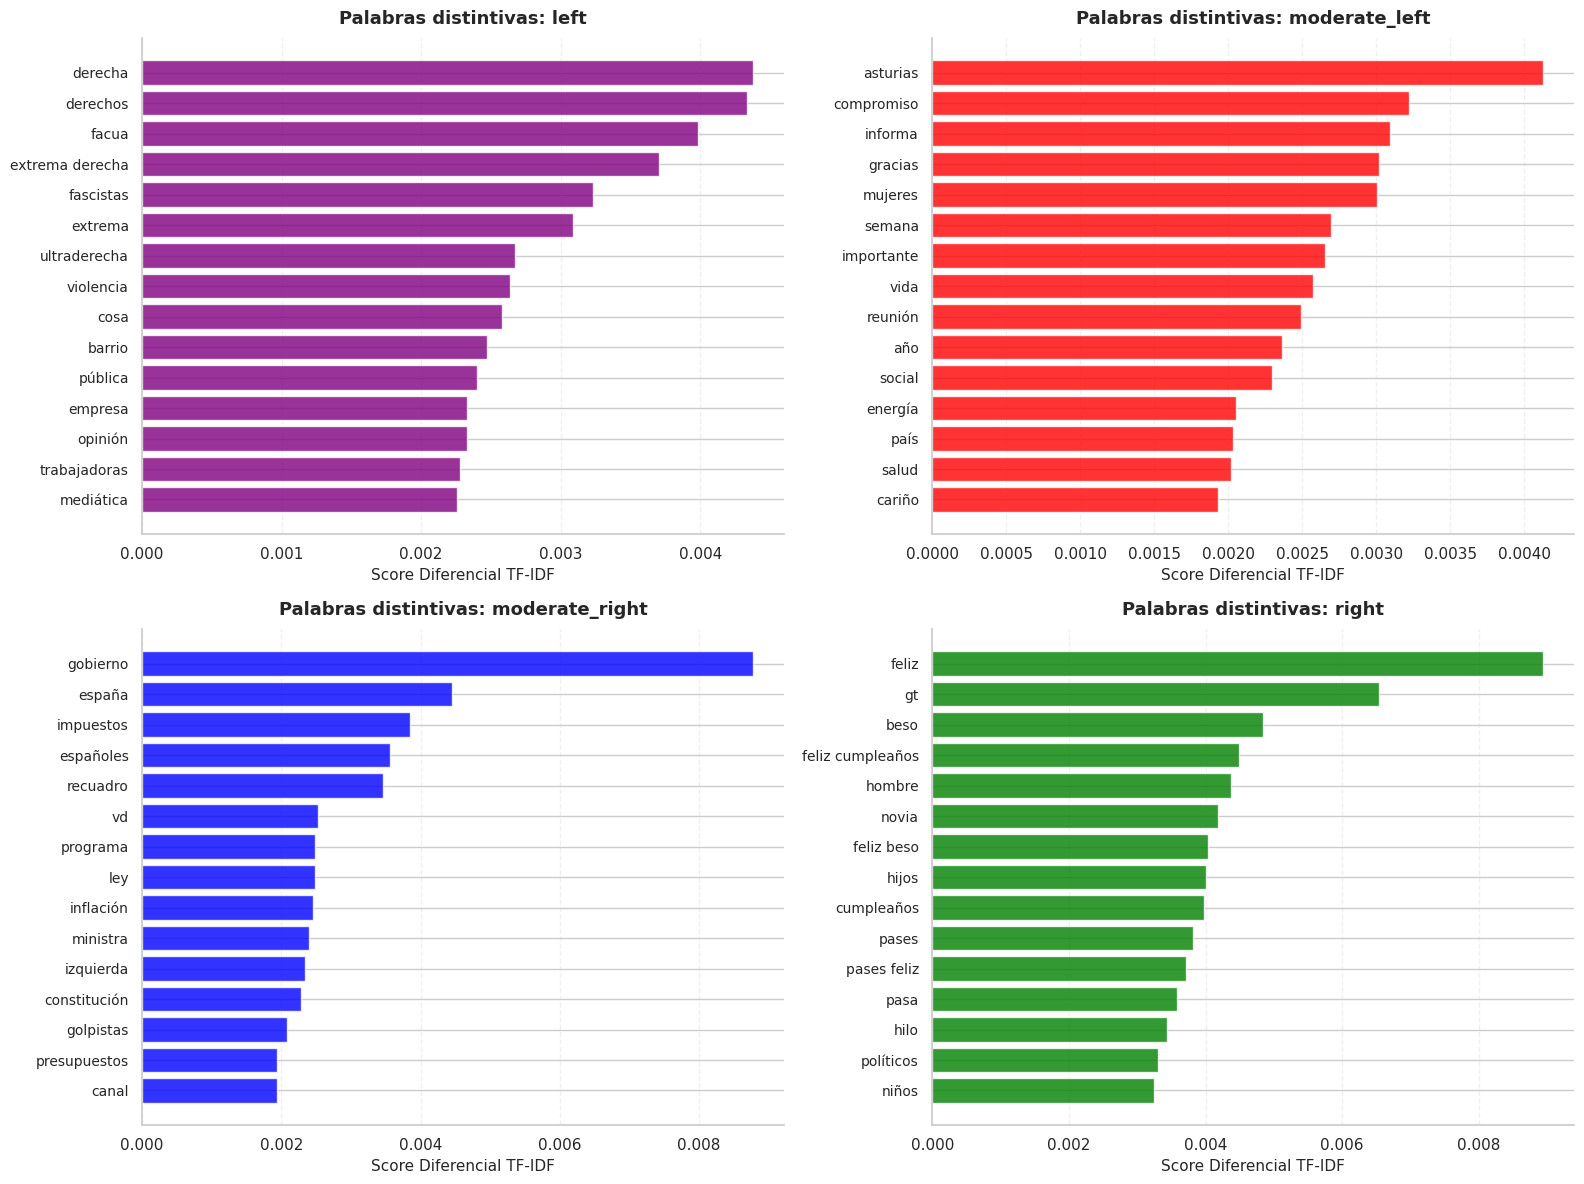

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (ideo, df_palabras) in enumerate(palabras_distintivas.items()):
    ax = axes[idx]

    #Top 15 palabras
    top_15 = df_palabras.head(15)


    y_pos = np.arange(len(top_15))
    ax.barh(y_pos, top_15['diff_score'], color=palette_ideo[ideo], alpha=0.8)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_15['palabra'], fontsize=10)
    ax.invert_yaxis()
    ax.set_xlabel('Score Diferencial TF-IDF', fontsize=11)
    ax.set_title(f'Palabras distintivas: {ideo}',
                 fontsize=13, fontweight='bold', pad=10)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
#Calcula cuánto varía el uso de una palabra entre ideologías
#Alta varianza = palabra divisora: aparecen mucho en unas y poco en otras
#Baja varianza = palabra puente: aparecen en todas las ideologías con frecuencia similar
def calcular_varianza_ideologica(palabra):

    scores_por_ideo = []

    for ideo in ['left', 'moderate_left', 'moderate_right', 'right']:
        mask = Y_train == ideo
        tweets_ideo = X_train[mask]

        #Contar apariciones
        n_apariciones = sum(palabra in tweet.lower() for tweet in tweets_ideo)
        freq = n_apariciones / len(tweets_ideo) if len(tweets_ideo) > 0 else 0
        scores_por_ideo.append(freq)

    return np.var(scores_por_ideo), scores_por_ideo

#Obtener todas las palabras únicas más comunes
todas_palabras = set()
for df_palabras in palabras_distintivas.values():
    todas_palabras.update(df_palabras['palabra'].head(50).tolist())

print(f"Analizando {len(todas_palabras)} palabras únicas...")

resultados_varianza = []
for palabra in todas_palabras:
    varianza, scores = calcular_varianza_ideologica(palabra)
    resultados_varianza.append({
        'palabra': palabra,
        'varianza': varianza,
        'freq_left': scores[0],
        'freq_mod_left': scores[1],
        'freq_mod_right': scores[2],
        'freq_right': scores[3],
        'freq_media': np.mean(scores),
        'freq_min': np.min(scores),
        'freq_max': np.max(scores)
    })

df_varianza = pd.DataFrame(resultados_varianza)
df_varianza = df_varianza[df_varianza['freq_media'] > 0]  #Eliminar palabras sin uso
df_varianza = df_varianza.sort_values('varianza', ascending=False)

#Estadísticas de varianza
print(f"\nEstadísticas de varianza:")
print(f"  Media: {df_varianza['varianza'].mean():.6f}")
print(f"  Mediana: {df_varianza['varianza'].median():.6f}")


palabras_divisoras = df_varianza[
    (df_varianza['varianza'] > df_varianza['varianza'].quantile(0.75)) &
    (df_varianza['freq_media'] > 0.008)
].head(20)

palabras_puente = df_varianza[
    (df_varianza['varianza'] < df_varianza['varianza'].quantile(0.30)) &
    (df_varianza['freq_media'] > 0.015) &
    (df_varianza['freq_min'] > 0.005)
].head(20)

print("\n" + "="*80)
print("PALABRAS DIVISORAS (uso muy diferente entre ideologías)")
print("="*80)
print("\n{:<25} {:>10} {:>10} {:>10} {:>10} {:>10}".format(
    "Palabra", "Varianza", "Left", "Mod-L", "Mod-R", "Right"))
print("-"*80)
for _, row in palabras_divisoras.head(15).iterrows():
    print("{:<25} {:>10.6f} {:>10.3f} {:>10.3f} {:>10.3f} {:>10.3f}".format(
        row['palabra'], row['varianza'],
        row['freq_left'], row['freq_mod_left'],
        row['freq_mod_right'], row['freq_right']))

print("\n" + "="*80)
print("PALABRAS PUENTE (uso similar en todas las ideologías)")
print("="*80)
print("\n{:<25} {:>10} {:>10} {:>10} {:>10} {:>10}".format(
    "Palabra", "Varianza", "Left", "Mod-L", "Mod-R", "Right"))
print("-"*80)

if len(palabras_puente) > 0:
    for _, row in palabras_puente.head(15).iterrows():
        print("{:<25} {:>10.6f} {:>10.3f} {:>10.3f} {:>10.3f} {:>10.3f}".format(
            row['palabra'], row['varianza'],
            row['freq_left'], row['freq_mod_left'],
            row['freq_mod_right'], row['freq_right']))

Analizando 117 palabras únicas...

Estadísticas de varianza:
  Media: 0.000024
  Mediana: 0.000013

PALABRAS DIVISORAS (uso muy diferente entre ideologías)

Palabra                     Varianza       Left      Mod-L      Mod-R      Right
--------------------------------------------------------------------------------
gobierno                    0.000312      0.046      0.052      0.089      0.048
españa                      0.000227      0.029      0.052      0.070      0.060
derecha                     0.000132      0.040      0.020      0.014      0.011
feliz                       0.000072      0.003      0.009      0.009      0.026
presidente                  0.000067      0.009      0.027      0.027      0.013
derechos                    0.000061      0.025      0.012      0.008      0.004
ve                          0.000060      0.305      0.288      0.296      0.285
izquierda                   0.000058      0.025      0.007      0.024      0.026
cosa                        0.000

In [ ]:
#usando los embeddings de BERT para medir "distancia ideológica"

#Calcular el centroide de cada ideología en el espacio de embeddings
centroides_ideo = {}

for ideo in ['left', 'moderate_left', 'moderate_right', 'right']:
    mask = Y_train == ideo
    embeddings_ideo = embeddings_bert[mask]
    centroide = embeddings_ideo.mean(axis=0)
    centroides_ideo[ideo] = centroide
    print(f"Centroide calculado para {ideo}: shape {centroide.shape}")

#Calcular el centro político (promedio de todos)
centro_politico = embeddings_bert.mean(axis=0)
print(f"\nCentro político calculado: shape {centro_politico.shape}")

#Calcular centroides binarios (LEFT vs RIGHT)
mask_left = Y_train.isin(['left', 'moderate_left'])
mask_right = Y_train.isin(['right', 'moderate_right'])

centroide_left = embeddings_bert[mask_left].mean(axis=0)
centroide_right = embeddings_bert[mask_right].mean(axis=0)


Centroide calculado para left: shape (512,)
Centroide calculado para moderate_left: shape (512,)
Centroide calculado para moderate_right: shape (512,)
Centroide calculado para right: shape (512,)

Centro político calculado: shape (512,)


In [ ]:
from scipy.spatial.distance import cosine

#Calcula un score de polarización para un tweet dado su embedding
#- distance_to_center: distancia al centro político (0-1)
#- ideology_score: score ideológico (-1=left, +1=right)
#- is_extreme: si está en los extremos
def calcular_polarization_score(embedding):

    #Distancia al centro político (cuanto más lejos más polarizado)
    dist_centro = cosine(embedding, centro_politico)

    #Score ideológico: distancia a LEFT vs RIGHT
    dist_left = cosine(embedding, centroide_left)
    dist_right = cosine(embedding, centroide_right)

    ideology_score = (dist_left - dist_right) / (dist_left + dist_right + 1e-10)

    #Determinar si es extremo (en el 20% más alejado del centro)
    is_extreme = dist_centro > np.percentile([cosine(emb, centro_politico)
                                               for emb in embeddings_bert[:1000]], 80)

    return {
        'distance_to_center': dist_centro,
        'ideology_score': ideology_score,
        'is_extreme': is_extreme
    }

#Probar con tweets
print("\n" + "="*60)
print("EJEMPLOS DE POLARIZATION SCORES")
print("="*60)

for i in range(5):
    tweet = X_train.iloc[i]
    ideologia_real = Y_train.iloc[i]
    embedding = embeddings_bert[i]

    scores = calcular_polarization_score(embedding)

    print(f"\nTweet #{i+1}")
    print(f"  Texto: {tweet[:80]}...")
    print(f"  Ideología real: {ideologia_real}")
    print(f"  Distancia al centro: {scores['distance_to_center']:.4f}")
    print(f"  Ideology score: {scores['ideology_score']:+.4f} ({'LEFT' if scores['ideology_score'] < 0 else 'RIGHT'})")
    print(f"  ¿Es extremo?: {'SÍ' if scores['is_extreme'] else 'NO'}")


EJEMPLOS DE POLARIZATION SCORES

Tweet #1
  Texto: titular titulamos por el asesino nunca por la mujer que ha sido asesinada el foc...
  Ideología real: moderate_left
  Distancia al centro: 0.7124
  Ideology score: -0.0009 (LEFT)
  ¿Es extremo?: NO

Tweet #2
  Texto: esperamos que al policía de los bulos racistas le caiga una semejante o mayor al...
  Ideología real: left
  Distancia al centro: 0.5626
  Ideology score: +0.0126 (RIGHT)
  ¿Es extremo?: NO

Tweet #3
  Texto: tengo el deber de q cada uno de los ciudadanos del país tome una decisión libre ...
  Ideología real: moderate_left
  Distancia al centro: 0.6884
  Ideology score: +0.0024 (RIGHT)
  ¿Es extremo?: NO

Tweet #4
  Texto: hoy tengo más claro que nunca que el feminismo y la democracia mandarán a a la p...
  Ideología real: left
  Distancia al centro: 0.5216
  Ideology score: -0.0161 (LEFT)
  ¿Es extremo?: NO

Tweet #5
  Texto: lula tornero mecánico de formación recibe la banda presidencial de aline souza u...
  Ideología 

In [ ]:
#Calcular scores para todos los tweets del train set
polarization_data = []

for i in range(len(Y_train)):
    embedding = embeddings_bert[i]
    scores = calcular_polarization_score(embedding)

    polarization_data.append({
        'tweet': X_train.iloc[i],
        'ideology_real': Y_train.iloc[i],
        'distance_to_center': scores['distance_to_center'],
        'ideology_score': scores['ideology_score'],
        'is_extreme': scores['is_extreme']
    })

df_polarization = pd.DataFrame(polarization_data)

print(f"Scores calculados para {len(df_polarization)} tweets")
print(f"\nEstadísticas:")
print(f"  Distancia media al centro: {df_polarization['distance_to_center'].mean():.4f}")
print(f"  Tweets extremos: {df_polarization['is_extreme'].sum()} ({df_polarization['is_extreme'].mean()*100:.1f}%)")
print(f"  Ideology score medio: {df_polarization['ideology_score'].mean():+.4f}")

Scores calculados para 10080 tweets

Estadísticas:
  Distancia media al centro: 0.7043
  Tweets extremos: 2115 (21.0%)
  Ideology score medio: +0.0006


In [ ]:
print("="*80)
print("TWEETS MÁS EXTREMOS (mayor distancia al centro)")
print("="*80)

tweets_extremos = df_polarization.nlargest(10, 'distance_to_center')

for idx, row in tweets_extremos.iterrows():
    print(f"\n{'─'*80}")
    print(f"Ideología: {row['ideology_real'].upper()} | "
          f"Distancia: {row['distance_to_center']:.4f} | "
          f"Ideology Score: {row['ideology_score']:+.4f}")
    print(f"Tweet: {row['tweet'][:200]}...")

print("\n\n" + "="*80)
print("TWEETS MÁS CENTRISTAS (menor distancia al centro)")
print("="*80)

tweets_centristas = df_polarization.nsmallest(10, 'distance_to_center')

for idx, row in tweets_centristas.iterrows():
    print(f"\n{'─'*80}")
    print(f"Ideología: {row['ideology_real'].upper()} | "
          f"Distancia: {row['distance_to_center']:.4f} | "
          f"Ideology Score: {row['ideology_score']:+.4f}")
    print(f"Tweet: {row['tweet'][:200]}...")


TWEETS MÁS EXTREMOS (mayor distancia al centro)

────────────────────────────────────────────────────────────────────────────────
Ideología: LEFT | Distancia: 1.0407 | Ideology Score: +0.0016
Tweet: lo segundo se hace lo primero es subjetivo...

────────────────────────────────────────────────────────────────────────────────
Ideología: MODERATE_LEFT | Distancia: 1.0378 | Ideology Score: -0.0029
Tweet: dónde pone que sea en directo...

────────────────────────────────────────────────────────────────────────────────
Ideología: MODERATE_LEFT | Distancia: 1.0214 | Ideology Score: +0.0088
Tweet: pero el oro se lo llevó sólo él...

────────────────────────────────────────────────────────────────────────────────
Ideología: RIGHT | Distancia: 1.0193 | Ideology Score: +0.0104
Tweet: en cualquier circunstancia incluso cuando se lo ponen así...

────────────────────────────────────────────────────────────────────────────────
Ideología: MODERATE_RIGHT | Distancia: 1.0047 | Ideology Score: -0.0028


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("="*60)
print("ANÁLISIS DE CONFUSIÓN DEL MODELO")
print("="*60)

#Hacer predicciones con el mejor modelo (lr_bert)
preds_val = lr_bert.predict(X_val_bert)

#y_val_labels son valores reales de Y_val
y_val_labels = Y_val.values


cm = confusion_matrix(y_val_labels, preds_val,
                      labels=['left', 'moderate_left', 'moderate_right', 'right'])

print(f"Accuracy: {(y_val_labels == preds_val).mean():.4f}")
print("\nMatriz de confusión:")
print(cm)

ANÁLISIS DE CONFUSIÓN DEL MODELO
Accuracy: 0.3769

Matriz de confusión:
[[316 185 134 193]
 [320 613 325 314]
 [294 328 443 351]
 [ 85  74  89 256]]


In [ ]:
#Identificar tweets donde el modelo se confunde
df_val_analysis = pd.DataFrame({
    'tweet': X_val.values,
    'real': y_val_labels,
    'predicted': preds_val,
    'correct': y_val_labels == preds_val
})

#Tweets que se han clasificado mal (puede ser interesante para la presentación si os gusta)
tweets_incorrectos = df_val_analysis[~df_val_analysis['correct']]

print("="*80)
print(f"TWEETS INCORRECTAMENTE CLASIFICADOS: {len(tweets_incorrectos)} de {len(df_val_analysis)}")
print("="*80)

#Confusiones más comunes
confusiones = tweets_incorrectos.groupby(['real', 'predicted']).size().sort_values(ascending=False)

print("\nConfusiones más frecuentes:")
print(confusiones.head(10))

#Tweets ambiguos --> confusión entre moderate_left y moderate_right
print("\n" + "="*80)
print("TWEETS AMBIGUOS: Confusión entre MODERATE_LEFT y MODERATE_RIGHT")
print("="*80)

ambiguos_lr = tweets_incorrectos[
    ((tweets_incorrectos['real'] == 'moderate_left') & (tweets_incorrectos['predicted'] == 'moderate_right')) |
    ((tweets_incorrectos['real'] == 'moderate_right') & (tweets_incorrectos['predicted'] == 'moderate_left'))
]

print(f"\nTotal de confusiones moderate_left ↔ moderate_right: {len(ambiguos_lr)}")

for i, (idx, row) in enumerate(ambiguos_lr.head(10).iterrows()):
    print(f"\n{'─'*80}")
    print(f"#{i+1} | Real: {row['real']} → Predicho: {row['predicted']}")
    print(f"Tweet: {row['tweet'][:250]}...")

#weets ambiguos --> confusión entre left y moderate_left
print("\n" + "="*80)
print("TWEETS AMBIGUOS: Confusión entre LEFT y MODERATE_LEFT")
print("="*80)

ambiguos_ll = tweets_incorrectos[
    ((tweets_incorrectos['real'] == 'left') & (tweets_incorrectos['predicted'] == 'moderate_left')) |
    ((tweets_incorrectos['real'] == 'moderate_left') & (tweets_incorrectos['predicted'] == 'left'))
]

print(f"\nTotal de confusiones left ↔ moderate_left: {len(ambiguos_ll)}")

for i, (idx, row) in enumerate(ambiguos_ll.head(10).iterrows()):
    print(f"\n{'─'*80}")
    print(f"#{i+1} | Real: {row['real']} → Predicho: {row['predicted']}")
    print(f"Tweet: {row['tweet'][:250]}...")

TWEETS INCORRECTAMENTE CLASIFICADOS: 2692 de 4320

Confusiones más frecuentes:
real            predicted     
moderate_right  right             351
                moderate_left     328
moderate_left   moderate_right    325
                left              320
                right             314
moderate_right  left              294
left            right             193
                moderate_left     185
                moderate_right    134
right           moderate_right     89
dtype: int64

TWEETS AMBIGUOS: Confusión entre MODERATE_LEFT y MODERATE_RIGHT

Total de confusiones moderate_left ↔ moderate_right: 653

────────────────────────────────────────────────────────────────────────────────
#1 | Real: moderate_right → Predicho: moderate_left
Tweet: esta semana en el congreso no todo ha sido aciago otra vez la comisión de asuntos económicos se convierte en remanso de paz en oasis en el desierto en lo que da sentido al poder legislativo el trabajo y el diálogo algo que en llevamo

In [ ]:
#Para analizar tweets del usuario con el lr de bert (es el que mejor resultado nos dio)

def analizar_tweet_completo(texto, mostrar_detalles=True):

    from sentence_transformers import SentenceTransformer

    #Limpiar el tweet
    texto_limpio = limpiar_tweet(texto)

    #Obtener embedding
    model_st = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2', device=device)
    embedding = model_st.encode([texto_limpio])[0]

    #Predicción con el modelo
    pred = lr_bert.predict([embedding])[0]

    #Probabilidades
    if hasattr(lr_bert, 'predict_proba'):
        probas = lr_bert.predict_proba([embedding])[0]
        proba_dict = {label: prob for label, prob in zip(['left', 'moderate_left', 'moderate_right', 'right'], probas)}
    else:
        proba_dict = None

    #Polarization score
    pol_scores = calcular_polarization_score(embedding)

    #Palabras divisoras presentes
    palabras_div_presentes = []
    for _, row in palabras_divisoras.head(30).iterrows():
        if row['palabra'] in texto_limpio.lower():
            palabras_div_presentes.append(row['palabra'])

    if mostrar_detalles:
        print("\n" + "█"*80)
        print("█" + " "*78 + "█")
        print("█" + " "*25 + "ANÁLISIS DE TWEET" + " "*37 + "█")
        print("█" + " "*78 + "█")
        print("█"*80)

        print(f"\nTEXTO ORIGINAL:")
        print(f"   {texto}")

        print(f"\n{'─'*80}")
        print("PREDICCIÓN IDEOLÓGICA")
        print('─'*80)
        print(f"   - Ideología predicha: {pred.upper()}")

        if proba_dict:
            print(f"\n   Distribución de probabilidades:")
            for label in ['left', 'moderate_left', 'moderate_right', 'right']:
                prob = proba_dict[label]
                bar_length = int(prob * 40)
                bar = "█" * bar_length + "░" * (40 - bar_length)
                print(f"     {label:20s} [{bar}] {prob*100:5.2f}%")

        print(f"\n{'─'*80}")
        print("POLARIZATION SCORE")
        print('─'*80)
        print(f"   - Distancia al centro político: {pol_scores['distance_to_center']:.4f}")

        ideology_normalized = (pol_scores['ideology_score'] + 1) / 2  # 0 a 1
        bar_pos = int(ideology_normalized * 40)
        ideology_bar = "─" * bar_pos + "●" + "─" * (40 - bar_pos)
        print(f"\n   Espectro ideológico:")
        print(f"     LEFT {ideology_bar} RIGHT")
        print(f"     Score: {pol_scores['ideology_score']:+.4f}")


        print(f"\n{'─'*80}")
        print(" PALABRAS CLAVE DETECTADAS")
        print('─'*80)
        if palabras_div_presentes:
            print(f"   Palabras divisoras encontradas:")
            for palabra in palabras_div_presentes:
                print(f"     • {palabra}")
        else:
            print(f"    No se encontraron palabras divisoras significativas")

    return {
        'prediccion': pred,
        'probabilidades': proba_dict,
        'polarization': pol_scores,
        'palabras_clave': palabras_div_presentes,
        'embedding': embedding
    }


In [ ]:
def sistema_interactivo():

    print("\n" + "="*80)
    print("╔" + "═"*78 + "╗")
    print("║" + " "*20 + "ANALIZADOR DE TWEETS INTERACTIVO" + " "*26 + "║")
    print("╚" + "═"*78 + "╝")
    print("\nEscribe tweets y descubre su posición ideológica y polarización")
    print("Escribe 'salir' para terminar")
    print("="*80)

    tweets_analizados = []

    while True:
        print("\n" + "─"*80)
        tweet_usuario = input("\nEscribe un tweet: ").strip()

        if tweet_usuario.lower() in ['salir', 'exit', 'quit', '']:
            print("\n exited")
            break

        #Analizar el tweet
        resultado = analizar_tweet_completo(tweet_usuario, mostrar_detalles=True)
        tweets_analizados.append({
            'texto': tweet_usuario,
            'resultado': resultado
        })

        #Preguntar si quiere continuar
        print("\n" + "─"*80)
        continuar = input("\n¿Analizar otro tweet? (Enter para continuar, 'n' para salir): ").strip()
        if continuar.lower() in ['n', 'no', 'salir']:
            break

    return tweets_analizados

#Ejecutar el sistema
tweets_usuario = sistema_interactivo()


╔══════════════════════════════════════════════════════════════════════════════╗
║                    ANALIZADOR DE TWEETS INTERACTIVO                          ║
╚══════════════════════════════════════════════════════════════════════════════╝

Escribe tweets y descubre su posición ideológica y polarización
Escribe 'salir' para terminar

────────────────────────────────────────────────────────────────────────────────

Escribe un tweet: Mariano Rajoy debería volver al gobierno

████████████████████████████████████████████████████████████████████████████████
█                                                                              █
█                         ANÁLISIS DE TWEET                                     █
█                                                                              █
████████████████████████████████████████████████████████████████████████████████

TEXTO ORIGINAL:
   Mariano Rajoy debería volver al gobierno

──────────────────────────────────────────────────

# Binary


##TF-IDF: representación basada en frecuencias de término e inversa de frecuencia de documento.

In [5]:
#preprocesado del texto
import re

def limpiar_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'@[\w_]+', '', tweet)         #eliminar @user
    tweet = re.sub(r'http\S+', '', tweet)         #eliminar URLs
    tweet = re.sub(r'[^a-záéíóúñü ]', ' ', tweet) #dejar solo letras

    #palabras en inglés que se han colado de nombres que hay que filtrar
    tweet = re.sub(r'hashtag', ' ', tweet)
    tweet = re.sub(r'politician', ' ', tweet)
    tweet = re.sub(r'party', ' ', tweet)
    tweet = re.sub(r'political party', ' ', tweet)
    tweet = re.sub(r'political', ' ', tweet)

    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

df["tweet_clean"] = df["tweet"].apply(limpiar_tweet)
df["tweet_clean"].head()

0    escribió un libro resultón con gracejo que mue...
1                   lo prometido es deuda aquí la foto
2    bastante ñoña me jarté a llorar de lo más tera...
3    no sé nada acerca de eso pero está claro que v...
4          en qué medio tienen su podcast esos dice ud
Name: tweet_clean, dtype: object

In [6]:
dev_test["tweet_clean"] = dev_test["tweet"].apply(limpiar_tweet)
dev_test["tweet_clean"].head()

0    feliz de febrero a todas las andaluzas y andal...
1    un placer encontrarme con mi homólogo alemán c...
2    la academia de la llingua asturiana realiza un...
3    cumplir con la ley y con los derechos laborale...
4    la contratación indefinida comienza a ser la n...
Name: tweet_clean, dtype: object

In [7]:
from sklearn.model_selection import train_test_split

X_dev = df["tweet_clean"]
Y_dev = df["ideology_binary"]
X_test = dev_test["tweet_clean"]
Y_test = dev_test["ideology_binary"]

X_train, X_val, Y_train, Y_val = train_test_split(X_dev, Y_dev, test_size=0.3, stratify=Y_dev,random_state=42)
print(f"División de datos:")
print(f"   TRAIN:      {len(X_train):,} tweets")
print(f"   VALIDATION: {len(X_val):,} tweets")
print(f"   TEST:       {len(X_test):,} tweets")

División de datos:
   TRAIN:      10,080 tweets
   VALIDATION: 4,320 tweets
   TEST:       3,600 tweets


In [8]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.blank("es")
stopwords_es = list(nlp.Defaults.stop_words)

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=3,
    stop_words=stopwords_es
)

X_tfidf_train = vectorizer.fit_transform(X_train)
X_tfidf_val   = vectorizer.transform(X_val)
X_tfidf_test  = vectorizer.transform(X_test)

feature_names_train = vectorizer.get_feature_names_out()

print("Dimensiones de la matriz TF-IDF train set:", X_tfidf_train.shape)
print("Dimensiones de la matriz TF-IDF validation set:", X_tfidf_val.shape)
print("Dimensiones de la matriz TF-IDF test set:", X_tfidf_test.shape)


Dimensiones de la matriz TF-IDF train set: (10080, 5000)
Dimensiones de la matriz TF-IDF validation set: (4320, 5000)
Dimensiones de la matriz TF-IDF test set: (3600, 5000)


In [9]:
feature_names = vectorizer.get_feature_names_out()
feature_names[:50]   #primeras 50 palabras


array(['abajo', 'abandonado', 'abandonar', 'abandono', 'abc', 'abierta',
       'abiertamente', 'abierto', 'abogacía', 'abogado', 'abogados',
       'abono', 'abonos', 'abordar', 'abortar', 'aborto', 'abortos',
       'abra', 'abrazo', 'abre', 'abren', 'abril', 'abrir', 'abro',
       'abro hilo', 'absoluta', 'absolutamente', 'absoluto', 'absurdo',
       'abuelos', 'abusador', 'abuso', 'abusos', 'abusos sexuales',
       'acaba', 'acaban', 'acabar', 'acabaron', 'acabará', 'acabe',
       'acabo', 'acabó', 'academia', 'acaso', 'acceder', 'acceso',
       'accidente', 'acciones', 'acción', 'aceite'], dtype=object)

In [10]:
import numpy as np
tfidf_sums = np.asarray(X_tfidf_train.sum(axis=0)).ravel()
top_indices = tfidf_sums.argsort()[::-1][:20]

for idx in top_indices:
    print(feature_names_train[idx], tfidf_sums[idx])


gracias 123.30749631556846
gobierno 112.81193837309397
españa 106.71345545000133
años 96.94938510386673
madrid 79.05538295050233
ley 68.87025606108469
año 62.60844178678998
gente 61.333303543153434
mundo 57.330539862442855
país 54.99398685091198
política 51.06717180116633
vida 48.59287630698966
mujeres 48.29939272796856
cosas 47.99733202398992
personas 46.60263629678137
presidente 45.760672162546
partido 44.5025180507067
trabajo 44.500213760121255
historia 43.54809535494944
izquierda 43.0841724332994


In [11]:
dicc_tfidf = {}
feature_names = vectorizer.get_feature_names_out()
clases = Y_train.unique()  # usar solo el train set

for c in clases:
    mask = (Y_train == c).values  # mask con mismo tamaño que X_tfidf_train
    matriz_c = X_tfidf_train[mask]

    if matriz_c.shape[0] == 0:
        continue

    media_c = matriz_c.mean(axis=0).A1
    top_idx = np.where(media_c > 0)[0]

    dicc_tfidf[c] = {feature_names[i]: media_c[i] for i in top_idx}


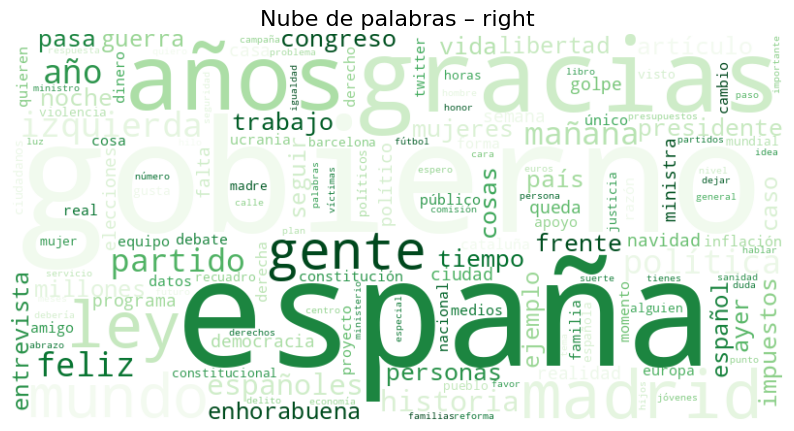

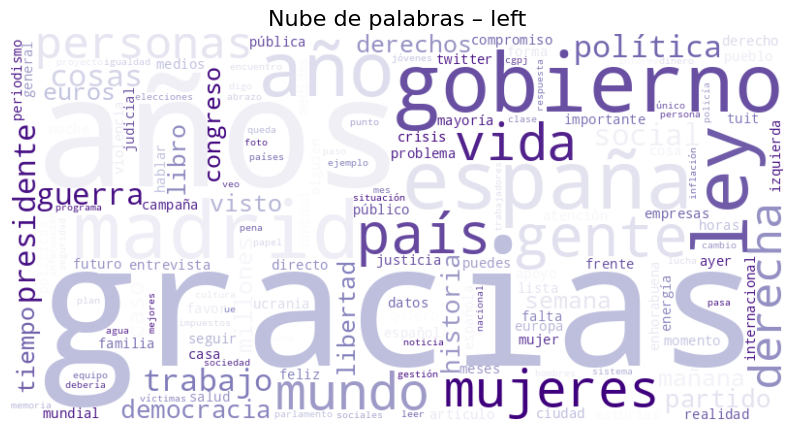

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import minmax_scale

colores = {
    "left": "Purples",
    "right": "Greens",
    "moderate_left": "Reds",
    "moderate_right": "Blues",
}

for clase, palabras_tfidf in dicc_tfidf.items():

    #Normalizar los TF-IDF
    frecuencias = np.array(list(palabras_tfidf.values()))
    frecuencias_norm = minmax_scale(frecuencias, feature_range=(0.1, 1.0))
    palabras_norm = {k: v for k, v in zip(palabras_tfidf.keys(), frecuencias_norm)}

    wc = WordCloud(
        background_color="white",
        colormap=colores.get(clase, "gray"),
        width=800,
        height=400,
        max_words=150
    ).generate_from_frequencies(palabras_norm)

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de palabras – {clase}", fontsize=16)
    plt.show()


##Word2Vec: representación de documentos como el promedio de los embeddings de las palabras que los componen.

In [13]:
!pip install gensim
from gensim.models import Word2Vec


In [14]:
train_tokens = [t.lower().split() for t in X_train]
val_tokens   = [t.lower().split() for t in X_val]
test_tokens  = [t.lower().split() for t in X_test]

In [15]:
#paso los tweets a una lista de palabras
w2v_model = Word2Vec(
    sentences=train_tokens,
    vector_size=300,   #dimensiones del embedding
    window=8,          #ventana de contexto
    min_count=3,       #ignora palabras que aparecen menos 3 veces
    sg=1,              #1 = Skip-gram, 0 = CBOW
    workers=4          #núcleos de CPU
)

In [16]:
from sklearn.preprocessing import normalize

def promedio_embeddings(tokens, model, dim=300):
    vectors = [model.wv[t] for t in tokens if t in model.wv.key_to_index]
    if len(vectors) == 0:
        return np.zeros(dim*2)
    vectors = np.array(vectors)
    avg = vectors.mean(axis=0)
    mx = vectors.max(axis=0)
    return np.concatenate([avg, mx])

dim = w2v_model.vector_size
embeddings_train = np.array([promedio_embeddings(t, w2v_model, dim) for t in train_tokens])
embeddings_val   = np.array([promedio_embeddings(t, w2v_model, dim) for t in val_tokens])
embeddings_test  = np.array([promedio_embeddings(t, w2v_model, dim) for t in test_tokens])


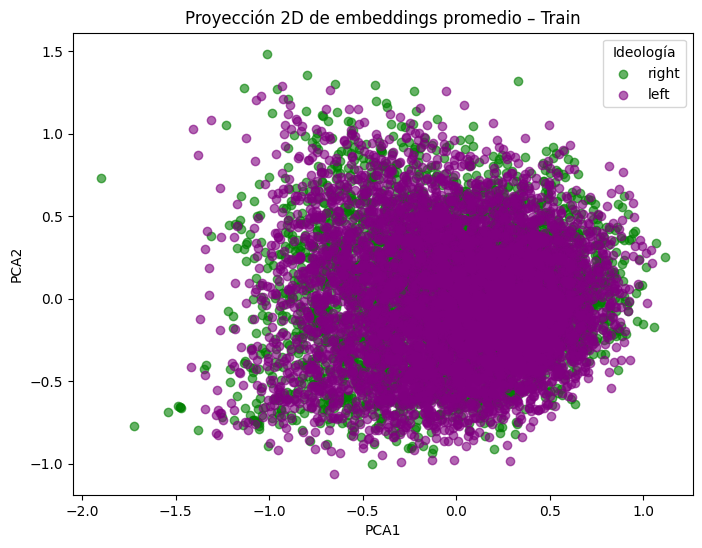

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
emb_pca_train = pca.fit_transform(embeddings_train)

classes = Y_train.unique()
colors_dict = {
    "left": "purple",
    "right": "green",
    "moderate_left": "red",
    "moderate_right": "blue"
}
colors = [colors_dict[c] for c in Y_train]

plt.figure(figsize=(8,6))
for clase in classes:
    mask = Y_train == clase
    plt.scatter(
        emb_pca_train[mask,0],
        emb_pca_train[mask,1],
        c=colors_dict[clase],
        label=clase,
        alpha=0.6
    )
plt.title("Proyección 2D de embeddings promedio – Train")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Ideología")
plt.show()


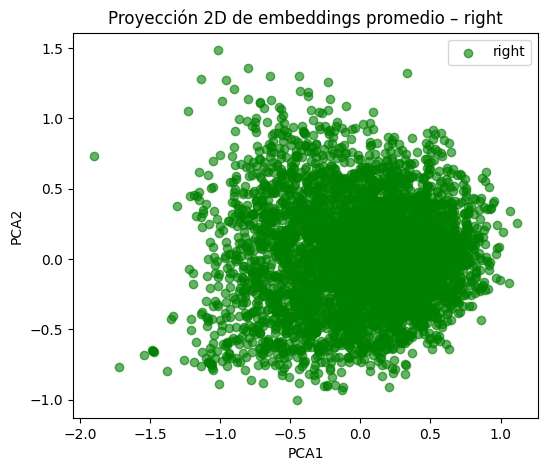

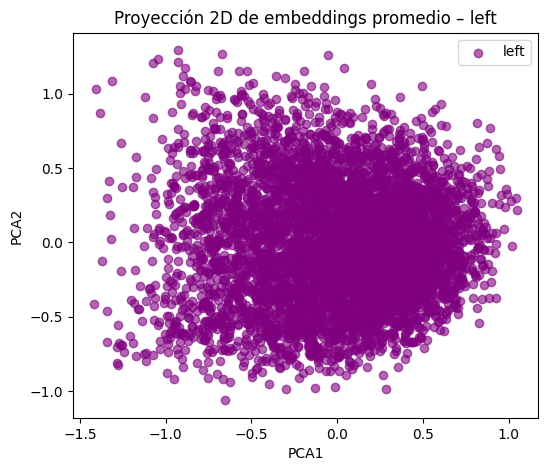

In [18]:
for clase in classes:
    mask = Y_train == clase
    plt.figure(figsize=(6,5))
    plt.scatter(
        emb_pca_train[mask,0],
        emb_pca_train[mask,1],
        c=colors_dict[clase],
        alpha=0.6,
        label=clase
    )
    plt.title(f"Proyección 2D de embeddings promedio – {clase}")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.legend()
    plt.show()


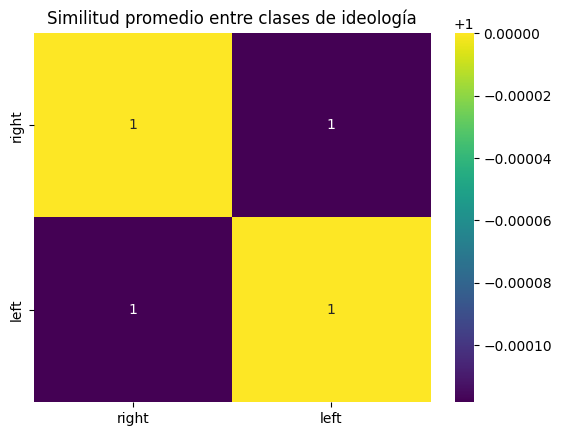

In [19]:
# Promedio por clase
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
clases = Y_train.unique()
emb_clases = np.array([embeddings_train[Y_train==c].mean(axis=0) for c in clases])
sim_matrix_clases = cosine_similarity(emb_clases)

sns.heatmap(sim_matrix_clases, annot=True, xticklabels=clases, yticklabels=clases, cmap="viridis")
plt.title("Similitud promedio entre clases de ideología")
plt.show()

## Embeddings contextuales: obtenidos mediante modelos de tipo Transformer (e.g., BERT, RoBERTa).


In [20]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [21]:
from sentence_transformers import SentenceTransformer

#Cargamos el modelo de BERT en español para poder analizar los tweets
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2',device=device)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [22]:

tweets_list = X_train.tolist()
tweets_list_val = X_val.tolist()
embeddings_bert = model.encode(tweets_list, batch_size=32, show_progress_bar=True,device=device)
embeddings_bert_val = model.encode(tweets_list_val, batch_size=32, show_progress_bar=True,device=device)
print("Dimensiones de los embeddings contextuales:", embeddings_bert.shape)

Batches:   0%|          | 0/315 [00:00<?, ?it/s]

Batches:   0%|          | 0/135 [00:00<?, ?it/s]

Dimensiones de los embeddings contextuales: (10080, 512)


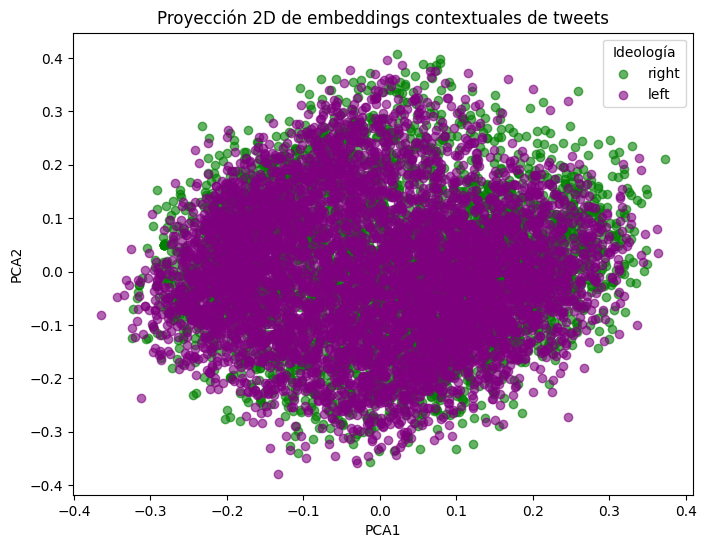

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
emb_pca = pca.fit_transform(embeddings_bert)

colors_dict = {
    "left": "purple",
    "right": "green",
    "moderate_left": "red",
    "moderate_right": "blue"
}

plt.figure(figsize=(8,6))
for clase in Y_train.unique():
    mask = Y_train == clase
    plt.scatter(
        emb_pca[mask,0],
        emb_pca[mask,1],
        c=colors_dict[clase],
        label=clase,
        alpha=0.6
    )

plt.title("Proyección 2D de embeddings contextuales de tweets")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Ideología")
plt.show()

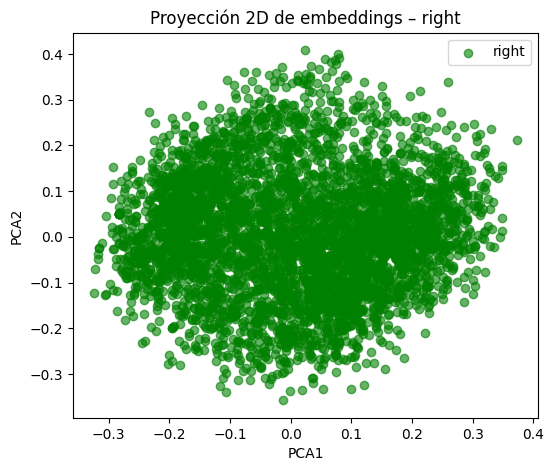

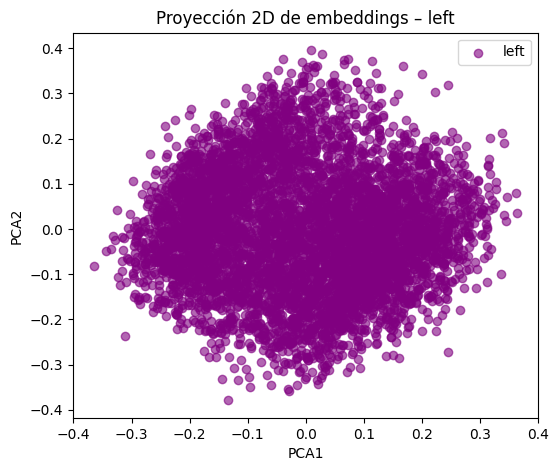

In [24]:
pca = PCA(n_components=2)
emb_pca = pca.fit_transform(embeddings_bert)

colors_dict = {
    "left": "purple",
    "right": "green",
    "moderate_left": "red",
    "moderate_right": "blue"
}

#Graficar solo usando Y_train
for clase in Y_train.unique():
    mask = Y_train == clase
    plt.figure(figsize=(6,5))
    plt.scatter(
        emb_pca[mask, 0],
        emb_pca[mask, 1],
        c=colors_dict[clase],
        alpha=0.6,
        label=clase
    )
    plt.title(f"Proyección 2D de embeddings – {clase}")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.legend()
    plt.show()


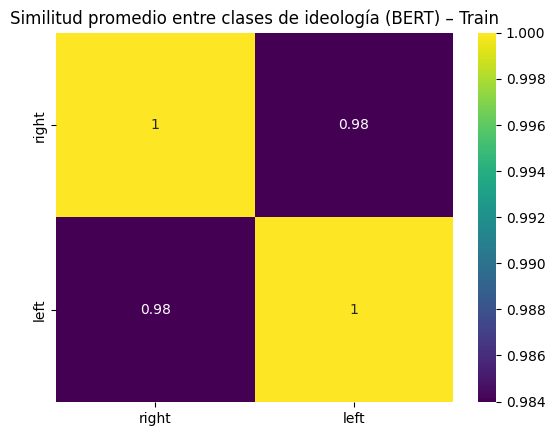

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Labels de train
clases = Y_train.unique()
emb_clases = np.array([embeddings_bert[Y_train == c].mean(axis=0) for c in clases])

#Similitud coseno
sim_matrix_clases = cosine_similarity(emb_clases)

sns.heatmap(sim_matrix_clases, annot=True, xticklabels=clases, yticklabels=clases, cmap="viridis")
plt.title("Similitud promedio entre clases de ideología (BERT) – Train")
plt.show()


## Comparativa de los tres

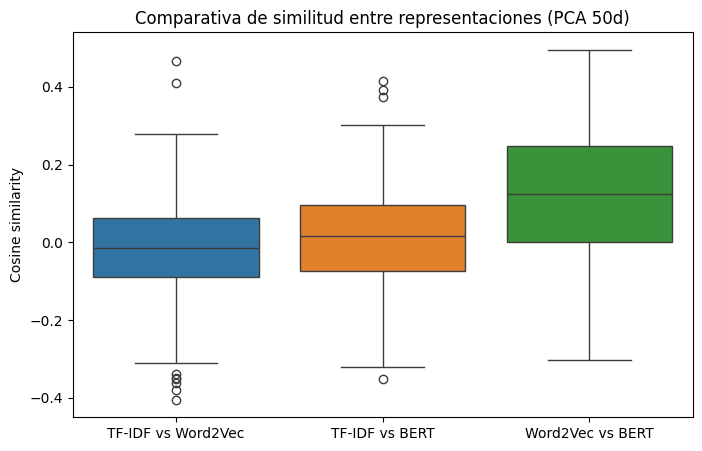

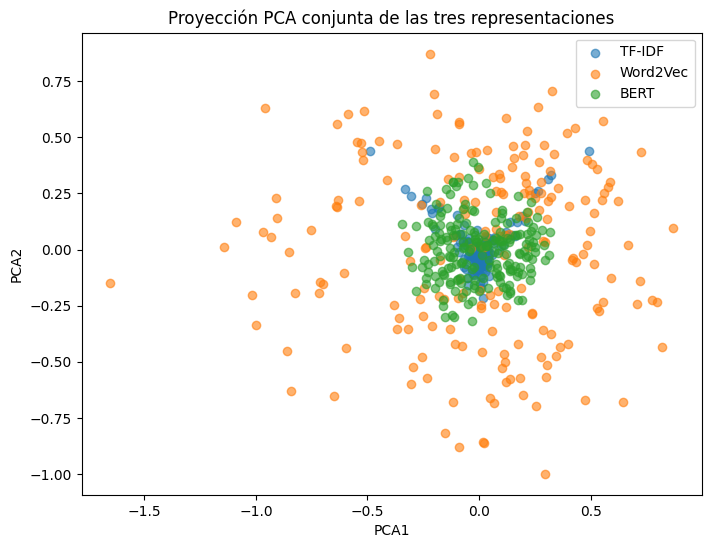

In [26]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

sample_size = 200
random_state = 42
np.random.seed(random_state)

#Muestreo aleatorio
total_samples = X_tfidf_train.shape[0]
sample_idx = np.random.choice(total_samples, size=sample_size, replace=False)

X_tfidf_sample = X_tfidf_train.toarray()[sample_idx]
emb_w2v_sample = embeddings_train[sample_idx]
emb_bert_sample = embeddings_bert[sample_idx]


pca_tfidf = PCA(n_components=50, random_state=random_state).fit_transform(X_tfidf_sample)
pca_w2v = PCA(n_components=50, random_state=random_state).fit_transform(emb_w2v_sample)
pca_bert = PCA(n_components=50, random_state=random_state).fit_transform(emb_bert_sample)

#similitud coseno
sim_tfidf_w2v = [cosine_similarity(pca_tfidf[i].reshape(1,-1), pca_w2v[i].reshape(1,-1))[0,0]
                  for i in range(sample_size)]
sim_tfidf_bert = [cosine_similarity(pca_tfidf[i].reshape(1,-1), pca_bert[i].reshape(1,-1))[0,0]
                  for i in range(sample_size)]
sim_w2v_bert = [cosine_similarity(pca_w2v[i].reshape(1,-1), pca_bert[i].reshape(1,-1))[0,0]
                for i in range(sample_size)]
#boxplot
df_sim = pd.DataFrame({
    "TF-IDF vs Word2Vec": sim_tfidf_w2v,
    "TF-IDF vs BERT": sim_tfidf_bert,
    "Word2Vec vs BERT": sim_w2v_bert
})

plt.figure(figsize=(8,5))
sns.boxplot(data=df_sim)
plt.title("Comparativa de similitud entre representaciones (PCA 50d)")
plt.ylabel("Cosine similarity")
plt.show()


X_combined = np.concatenate([pca_tfidf, pca_w2v, pca_bert], axis=0)
labels = ["TF-IDF"]*sample_size + ["Word2Vec"]*sample_size + ["BERT"]*sample_size
X_pca_2d = PCA(n_components=2, random_state=random_state).fit_transform(X_combined)


plt.figure(figsize=(8,6))
for label in ["TF-IDF", "Word2Vec", "BERT"]:
    mask = np.array(labels) == label
    plt.scatter(X_pca_2d[mask,0], X_pca_2d[mask,1], alpha=0.6, label=label)
plt.title("Proyección PCA conjunta de las tres representaciones")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


## Modelos Binarios

In [27]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np


In [28]:
classes = np.unique(Y_train)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=Y_train)
class_weight_dict = dict(zip(classes, weights))

def train_lr(X_train, y_train):
    model = LogisticRegression(max_iter=2000, class_weight=class_weight_dict)
    model.fit(X_train, y_train)
    return model

def train_svm(X_train, y_train):
    model = SVC(kernel="linear", probability=True, class_weight=class_weight_dict)
    model.fit(X_train, y_train)
    return model

def eval_model(model, X, y, title="RESULTADOS"):
    preds = model.predict(X)
    print("====", title, "====")
    print(classification_report(y, preds))


In [29]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        return self.net(x)



Nota: En train_nn he añadido WeightedRandomSampler que se usa para balancear las clases del dataset, ya que las clases de left y right aparecían poco y antes el modelo nunca las predecía en el word2vec. El sampler aumenta la probabilidad de muestrear ejemplos de estas clases durante el entrenamiento para que el MLP aprenda a reconocerlas, pero he mantenido el resto de la estructura igual que antes para el resto de evaluaciones en las que no sea necesaria.

In [30]:
def train_nn(X_train, y_train_num, X_val, y_val_num, epochs=10, lr=1e-3, sampler=False):
    device = "cuda" if torch.cuda.is_available() else "cpu"

    X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_t = torch.tensor(y_train_num, dtype=torch.long).to(device)
    X_val_t   = torch.tensor(X_val,   dtype=torch.float32).to(device)
    y_val_t   = torch.tensor(y_val_num,   dtype=torch.long).to(device)

    if sampler:
        from torch.utils.data import WeightedRandomSampler
        class_counts = np.bincount(y_train_num)
        class_weights = 1. / class_counts
        sample_weights = class_weights[y_train_num]
        sampler_obj = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)
        train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, sampler=sampler_obj)
    else:
        train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, shuffle=True)

    val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=256)

    model = MLP(X_train.shape[1], len(np.unique(y_train_num))).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            opt.zero_grad()
            loss = loss_fn(model(xb), yb)
            loss.backward()
            opt.step()

        # evaluación
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for xb, yb in val_loader:
                preds = model(xb).argmax(dim=1)
                correct += (preds == yb).sum().item()
                total += yb.size(0)
        print(f"Epoch {epoch+1}: Val Acc = {correct/total:.4f}")

    return model


TF-IDF

In [31]:
lr_tfidf = train_lr(X_tfidf_train, Y_train)
eval_model(lr_tfidf, X_tfidf_val, Y_val, "VAL LR + TFIDF")
eval_model(lr_tfidf, X_tfidf_test, Y_test, "TEST LR + TFIDF")


==== VAL LR + TFIDF ====
              precision    recall  f1-score   support

        left       0.67      0.66      0.66      2400
       right       0.58      0.59      0.58      1920

    accuracy                           0.63      4320
   macro avg       0.62      0.62      0.62      4320
weighted avg       0.63      0.63      0.63      4320

==== TEST LR + TFIDF ====
              precision    recall  f1-score   support

        left       0.69      0.64      0.66      2080
       right       0.55      0.60      0.57      1520

    accuracy                           0.62      3600
   macro avg       0.62      0.62      0.62      3600
weighted avg       0.63      0.62      0.63      3600



In [32]:
svm_tfidf = train_svm(X_tfidf_train, Y_train)
eval_model(svm_tfidf, X_tfidf_val, Y_val, "VAL SVM + TFIDF")
eval_model(svm_tfidf, X_tfidf_test, Y_test, "TEST SVM + TFIDF")


==== VAL SVM + TFIDF ====
              precision    recall  f1-score   support

        left       0.66      0.63      0.65      2400
       right       0.56      0.60      0.58      1920

    accuracy                           0.62      4320
   macro avg       0.61      0.61      0.61      4320
weighted avg       0.62      0.62      0.62      4320

==== TEST SVM + TFIDF ====
              precision    recall  f1-score   support

        left       0.68      0.61      0.64      2080
       right       0.53      0.60      0.56      1520

    accuracy                           0.61      3600
   macro avg       0.60      0.61      0.60      3600
weighted avg       0.62      0.61      0.61      3600



In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_num = le.fit_transform(Y_train)
y_val_num   = le.transform(Y_val)
y_test_num  = le.transform(Y_test)


In [34]:
nn_tfidf = train_nn(X_tfidf_train.toarray(), y_train_num,
                    X_tfidf_val.toarray(), y_val_num)


Epoch 1: Val Acc = 0.6315
Epoch 2: Val Acc = 0.6264
Epoch 3: Val Acc = 0.6282
Epoch 4: Val Acc = 0.6206
Epoch 5: Val Acc = 0.6204
Epoch 6: Val Acc = 0.6139
Epoch 7: Val Acc = 0.6120
Epoch 8: Val Acc = 0.6076
Epoch 9: Val Acc = 0.6141
Epoch 10: Val Acc = 0.6139


In [35]:
device = "cuda" if torch.cuda.is_available() else "cpu"

X_test_t = torch.tensor(X_tfidf_test.toarray(), dtype=torch.float32).to(device)
with torch.no_grad():
    preds = nn_tfidf(X_test_t).argmax(dim=1).cpu().numpy()
print(classification_report(y_test_num, preds))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      2080
           1       0.53      0.59      0.56      1520

    accuracy                           0.61      3600
   macro avg       0.61      0.61      0.61      3600
weighted avg       0.62      0.61      0.61      3600



Word2Vec

In [36]:
X_train_w2v = embeddings_train
X_val_w2v   = embeddings_val
X_test_w2v  = embeddings_test

In [37]:
lr_w2v = train_lr(X_train_w2v, Y_train)
eval_model(lr_w2v, X_val_w2v, Y_val, "VAL LR + Word2Vec")
eval_model(lr_w2v, X_test_w2v, Y_test, "TEST LR + Word2Vec")

==== VAL LR + Word2Vec ====
              precision    recall  f1-score   support

        left       0.61      0.57      0.58      2400
       right       0.50      0.54      0.52      1920

    accuracy                           0.55      4320
   macro avg       0.55      0.55      0.55      4320
weighted avg       0.56      0.55      0.56      4320

==== TEST LR + Word2Vec ====
              precision    recall  f1-score   support

        left       0.62      0.56      0.59      2080
       right       0.46      0.52      0.49      1520

    accuracy                           0.54      3600
   macro avg       0.54      0.54      0.54      3600
weighted avg       0.55      0.54      0.55      3600



In [38]:
svm_w2v = train_svm(X_train_w2v, Y_train)
eval_model(svm_w2v, X_val_w2v, Y_val, "VAL SVM + Word2Vec")
eval_model(svm_w2v, X_test_w2v, Y_test, "TEST SVM + Word2Vec")

==== VAL SVM + Word2Vec ====
              precision    recall  f1-score   support

        left       0.61      0.56      0.58      2400
       right       0.50      0.55      0.52      1920

    accuracy                           0.56      4320
   macro avg       0.55      0.56      0.55      4320
weighted avg       0.56      0.56      0.56      4320

==== TEST SVM + Word2Vec ====
              precision    recall  f1-score   support

        left       0.62      0.54      0.58      2080
       right       0.47      0.55      0.50      1520

    accuracy                           0.54      3600
   macro avg       0.54      0.54      0.54      3600
weighted avg       0.56      0.54      0.55      3600



In [39]:
nn_w2v = train_nn(X_train_w2v, y_train_num, X_val_w2v, y_val_num, epochs=15, lr=1e-3, sampler=True)

device = next(nn_w2v.parameters()).device
X_test_w2v_t = torch.tensor(X_test_w2v, dtype=torch.float32).to(device)
with torch.no_grad():
    preds = nn_w2v(X_test_w2v_t).argmax(dim=1).cpu().numpy()

print("=== TEST MLP + Word2Vec ===")
print(classification_report(y_test_num, preds))


Epoch 1: Val Acc = 0.5563
Epoch 2: Val Acc = 0.4449
Epoch 3: Val Acc = 0.5488
Epoch 4: Val Acc = 0.5373
Epoch 5: Val Acc = 0.4440
Epoch 6: Val Acc = 0.5229
Epoch 7: Val Acc = 0.4903
Epoch 8: Val Acc = 0.4991
Epoch 9: Val Acc = 0.5162
Epoch 10: Val Acc = 0.5641
Epoch 11: Val Acc = 0.5329
Epoch 12: Val Acc = 0.5403
Epoch 13: Val Acc = 0.5683
Epoch 14: Val Acc = 0.5262
Epoch 15: Val Acc = 0.5449
=== TEST MLP + Word2Vec ===
              precision    recall  f1-score   support

           0       0.62      0.47      0.54      2080
           1       0.46      0.61      0.52      1520

    accuracy                           0.53      3600
   macro avg       0.54      0.54      0.53      3600
weighted avg       0.55      0.53      0.53      3600



BERT

In [40]:
X_train_bert = embeddings_bert
X_val_bert   = embeddings_bert_val
X_test_bert  = model.encode(X_test.tolist(), batch_size=32, show_progress_bar=True, device=device)


Batches:   0%|          | 0/113 [00:00<?, ?it/s]

In [41]:
lr_bert = train_lr(X_train_bert, Y_train)
eval_model(lr_bert, X_val_bert, Y_val, "VAL LR + BERT")
eval_model(lr_bert, X_test_bert, Y_test, "TEST LR + BERT")

==== VAL LR + BERT ====
              precision    recall  f1-score   support

        left       0.65      0.59      0.62      2400
       right       0.54      0.61      0.57      1920

    accuracy                           0.60      4320
   macro avg       0.60      0.60      0.60      4320
weighted avg       0.60      0.60      0.60      4320

==== TEST LR + BERT ====
              precision    recall  f1-score   support

        left       0.66      0.55      0.60      2080
       right       0.50      0.60      0.55      1520

    accuracy                           0.58      3600
   macro avg       0.58      0.58      0.57      3600
weighted avg       0.59      0.58      0.58      3600



In [42]:
svm_bert = train_svm(X_train_bert, Y_train)
eval_model(svm_bert, X_val_bert, Y_val, "VAL SVM + BERT")
eval_model(svm_bert, X_test_bert, Y_test, "TEST SVM + BERT")

==== VAL SVM + BERT ====
              precision    recall  f1-score   support

        left       0.65      0.57      0.61      2400
       right       0.54      0.62      0.58      1920

    accuracy                           0.59      4320
   macro avg       0.60      0.60      0.59      4320
weighted avg       0.60      0.59      0.60      4320

==== TEST SVM + BERT ====
              precision    recall  f1-score   support

        left       0.66      0.53      0.59      2080
       right       0.49      0.62      0.55      1520

    accuracy                           0.57      3600
   macro avg       0.58      0.58      0.57      3600
weighted avg       0.59      0.57      0.57      3600



In [43]:
nn_bert = train_nn(X_train_bert, y_train_num, X_val_bert, y_val_num, epochs=10, lr=1e-3, sampler=False)

device = next(nn_bert.parameters()).device
X_test_bert_t = torch.tensor(X_test_bert, dtype=torch.float32).to(device)

with torch.no_grad():
    preds = nn_bert(X_test_bert_t).argmax(dim=1).cpu().numpy()

print("=== TEST MLP + BERT ===")
print(classification_report(y_test_num, preds))

Epoch 1: Val Acc = 0.6046
Epoch 2: Val Acc = 0.6074
Epoch 3: Val Acc = 0.6044
Epoch 4: Val Acc = 0.5986
Epoch 5: Val Acc = 0.6111
Epoch 6: Val Acc = 0.6162
Epoch 7: Val Acc = 0.6238
Epoch 8: Val Acc = 0.6174
Epoch 9: Val Acc = 0.6164
Epoch 10: Val Acc = 0.6167
=== TEST MLP + BERT ===
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      2080
           1       0.50      0.58      0.54      1520

    accuracy                           0.58      3600
   macro avg       0.58      0.58      0.58      3600
weighted avg       0.59      0.58      0.58      3600



Además, se deberá comparar el rendimiento de estas estrategias con un modelo Transformer preentrenado ajustado mediante fine-tuning con la librería Hugging Face Transformers.

In [44]:
!pip install transformers datasets accelerate evaluate

In [45]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
from transformers import Trainer
from transformers import DataCollatorWithPadding

from datasets import Dataset

from sklearn.metrics import accuracy_score, f1_score, classification_report
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {device}")

Usando dispositivo: cuda


In [46]:
#Convertir los datos a formato Dataset de Hugging Face

train_dataset = Dataset.from_dict({
    'text': X_train.tolist(),
    'label': y_train_num.tolist()
})

val_dataset = Dataset.from_dict({
    'text': X_val.tolist(),
    'label': y_val_num.tolist()
})

test_dataset = Dataset.from_dict({
    'text': X_test.tolist(),
    'label': y_test_num.tolist()
})

print(f"Train dataset: {len(train_dataset)} ejemplos")
print(f"Validation dataset: {len(val_dataset)} ejemplos")
print(f"Test dataset: {len(test_dataset)} ejemplos")
print(f"\nEjemplo de dato:")
print(train_dataset[0])

Train dataset: 10080 ejemplos
Validation dataset: 4320 ejemplos
Test dataset: 3600 ejemplos

Ejemplo de dato:
{'text': 'y mar espinar no descarta enfrentarse en primarias al candidato o candidata de al ayuntamiento de madrid muy entretenido ha estado hoy el día de la almudena en la capital y da un portazo a en la lista del', 'label': 1}


In [47]:
#BERT multilingüe
model_name = "bert-base-multilingual-cased"

#tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

#se carga el modelo para clasificación
num_labels = len(np.unique(y_train_num))
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    id2label={i: label for i, label in enumerate(le.classes_)},
    label2id={label: i for i, label in enumerate(le.classes_)}
)

print(f"Modelo cargado: {model_name}")
print(f"Número de clases: {num_labels}")
print(f"Clases: {le.classes_}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Modelo cargado: bert-base-multilingual-cased
Número de clases: 2
Clases: ['left' 'right']


In [48]:
#Función para tokenizar los datos
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding=False,
        truncation=True,
        max_length=128
    )

#Tokenizar todos los datasets
print("Tokenizando datasets:")
train_dataset_tokenized = train_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=['text']
)

val_dataset_tokenized = val_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=['text']
)

test_dataset_tokenized = test_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=['text']
)

print(f"\nEjemplo tokenizado:")
print(train_dataset_tokenized[0])

Tokenizando datasets:


Map:   0%|          | 0/10080 [00:00<?, ? examples/s]

Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/3600 [00:00<?, ? examples/s]


Ejemplo tokenizado:
{'label': 1, 'input_ids': [101, 193, 12318, 10196, 37017, 10129, 10192, 10139, 15983, 10213, 73083, 10341, 10110, 62032, 10107, 10164, 30423, 183, 107902, 10104, 10164, 99836, 10104, 10824, 40230, 10162, 13436, 10402, 63250, 10228, 11965, 25235, 10125, 14184, 10104, 10109, 10164, 11717, 53091, 10110, 10109, 12185, 193, 10143, 10119, 17953, 12096, 169, 10110, 10109, 15843, 10127, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [49]:
#El data collator hace padding dinámico en cada batch para que no le entren demasiados espacios en blanco
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [50]:
#función para calcular las metricas durante el entrenamiento
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    f1_macro = f1_score(labels, predictions, average='macro')
    f1_weighted = f1_score(labels, predictions, average='weighted')

    return {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted
    }

In [51]:
#Configuración del entrenamiento
training_args = TrainingArguments(
    output_dir='./results_bert_multilingue',     #Donde guarda los checkpoints

    #Épocas y batch size
    num_train_epochs=3,                          #Número de épocas
    per_device_train_batch_size=16,              #Batch size para train
    per_device_eval_batch_size=32,               #Batch size para eval

    #Optimización
    learning_rate=2e-5,                          #Learning rate típico para fine-tuning BERT (según internet yo me fio)
    weight_decay=0.01,                           #Regularización L2
    warmup_steps=500,                            #Warmup del learning rate

    # Evaluación y guardado
    eval_strategy="epoch",                       #Evaluar cada época
    save_strategy="epoch",                       #Guardar cada época
    load_best_model_at_end=True,                 #Cargar el mejor modelo al final
    metric_for_best_model="f1_macro",            #Métrica para elegir el mejor modelo
    greater_is_better=True,                      #Mayor f1_macro es mejor

    #Logging
    logging_dir='./logs_bert',
    logging_steps=50,                            #Log cada 50 pasos

    seed=42,
    fp16=torch.cuda.is_available(),              #Usar mixed precision si hay GPU
)

print("Argumentos de entrenamiento configurados:")
print(f"  - Épocas: {training_args.num_train_epochs}")
print(f"  - Learning rate: {training_args.learning_rate}")
print(f"  - Batch size (train): {training_args.per_device_train_batch_size}")
print(f"  - Métrica principal: {training_args.metric_for_best_model}")

Argumentos de entrenamiento configurados:
  - Épocas: 3
  - Learning rate: 2e-05
  - Batch size (train): 16
  - Métrica principal: f1_macro


In [52]:
#el trainer que es el que va a hacer el fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_tokenized,
    eval_dataset=val_dataset_tokenized,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print(f"  - Train samples: {len(train_dataset_tokenized)}")
print(f"  - Validation samples: {len(val_dataset_tokenized)}")

  - Train samples: 10080
  - Validation samples: 4320


In [53]:
#Entrenar el modelo
print("\n" + "="*60)
print("INICIANDO FINE-TUNING")
print("="*60)

train_result = trainer.train()

print("\n" + "="*60)
print("ENTRENAMIENTO FINALIZADO")
print("="*60)
print(f"Training loss final: {train_result.training_loss:.4f}")


INICIANDO FINE-TUNING


wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 3


wandb: You chose "Don't visualize my results"



ENTRENAMIENTO FINALIZADO
Training loss final: 0.6016


In [54]:
#Evaluar en el conjunto de validación
print("\n" + "="*60)
print("EVALUACIÓN EN VALIDATION SET")
print("="*60)

eval_results = trainer.evaluate()

print(f"\nResultados en Validation:")
print(f"  • Accuracy:    {eval_results['eval_accuracy']:.4f}")
print(f"  • F1-macro:    {eval_results['eval_f1_macro']:.4f}")
print(f"  • F1-weighted: {eval_results['eval_f1_weighted']:.4f}")
print(f"  • Loss:        {eval_results['eval_loss']:.4f}")


EVALUACIÓN EN VALIDATION SET



Resultados en Validation:
  • Accuracy:    0.6461
  • F1-macro:    0.6354
  • F1-weighted: 0.6423
  • Loss:        0.7001


In [55]:
#Ver el classification report completo en validation
predictions_val = trainer.predict(val_dataset_tokenized)
preds_val = np.argmax(predictions_val.predictions, axis=1)

print("\n" + "="*60)
print("CLASSIFICATION REPORT - VALIDATION")
print("="*60)
print(classification_report(y_val_num, preds_val, target_names=le.classes_))


CLASSIFICATION REPORT - VALIDATION
              precision    recall  f1-score   support

        left       0.66      0.74      0.70      2400
       right       0.62      0.53      0.57      1920

    accuracy                           0.65      4320
   macro avg       0.64      0.63      0.64      4320
weighted avg       0.64      0.65      0.64      4320



In [56]:
#Evaluar en el conjunto de TEST (CUIDADO esto se hace solo una vez al final que sino no son significativas para los resultados finales)
print("\n" + "="*60)
print("EVALUACIÓN FINAL CON TEST SET")
print("="*60)

#Predecir en test
predictions_test = trainer.predict(test_dataset_tokenized)
preds_test = np.argmax(predictions_test.predictions, axis=1)

#Métricas
accuracy_test = accuracy_score(y_test_num, preds_test)
f1_macro_test = f1_score(y_test_num, preds_test, average='macro')
f1_weighted_test = f1_score(y_test_num, preds_test, average='weighted')

print(f"\nResultados en Test:")
print(f"  • Accuracy:    {accuracy_test:.4f}")
print(f"  • F1-macro:    {f1_macro_test:.4f}")
print(f"  • F1-weighted: {f1_weighted_test:.4f}")

print("\n" + "="*60)
print("CLASSIFICATION REPORT - TEST")
print("="*60)
print(classification_report(y_test_num, preds_test, target_names=le.classes_))


EVALUACIÓN FINAL CON TEST SET



Resultados en Test:
  • Accuracy:    0.6247
  • F1-macro:    0.6116
  • F1-weighted: 0.6227

CLASSIFICATION REPORT - TEST
              precision    recall  f1-score   support

        left       0.67      0.70      0.68      2080
       right       0.56      0.52      0.54      1520

    accuracy                           0.62      3600
   macro avg       0.61      0.61      0.61      3600
weighted avg       0.62      0.62      0.62      3600



In [57]:
#Guardar el modelo fine-tuneado (solo ejecutad si quereis usarlo sin tener que entrenarlo cada vez que ejecutamos todo)
model_save_path = "./bert_multilingue_finetuned"
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"  Modelo guardado en: {model_save_path}")
print(f"  se puede cargar con:")
print(f"  model = AutoModelForSequenceClassification.from_pretrained('{model_save_path}')")
print(f"  tokenizer = AutoTokenizer.from_pretrained('{model_save_path}')")

  Modelo guardado en: ./bert_multilingue_finetuned
  se puede cargar con:
  model = AutoModelForSequenceClassification.from_pretrained('./bert_multilingue_finetuned')
  tokenizer = AutoTokenizer.from_pretrained('./bert_multilingue_finetuned')
